# Izbor instanci podataka - Credit Card Fraud Detection

Dataset Credit Card Fraud Detection odnosi se na transakcije kreditnim karticama koje su obavili evropski korisnici u septembru 2013. godine. Ovaj dataset se fokusira na transakcije koje su se desile tokom dva dana i obuhvata ukupno 284.807 transakcija. Među njima je samo 492 slučaja identifikovano kao lažne transakcije. Očigledno je da je dataset veoma neuravnotežen, sa pojavom pozitivne klase (prevara) koja čini samo 0,172% od ukupnog broja transakcija. Link do dataseta: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *
from imblearn.pipeline import make_pipeline
from collections import Counter
import pylab
pylab.rcParams['figure.figsize'] = (8, 5)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import PrecisionRecallDisplay
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
RANDOM_STATE = 42010

###  Učitavanje skupa podataka

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
# Prikaz prvih 5 redova
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
# Oblik skupa podataka
df.shape

(284807, 31)

In [5]:
# Informacije o skupu podataka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

### Nedostajuće vrednosti

In [7]:
# provera da li postoje nedostajuće vrednosti
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Nema nedostajućih vrednosti.

### Uklanjanje duplikata

In [8]:
duplicated_values = df[df.duplicated()]
duplicated_values

Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  ...       V21       V22       V23  \
33      0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
35      0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
113    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
114    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
115    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
...          ...       ...       ...  ...       ...       ...       ...   
282987 -0.881302  1.081750  1.022928  ... -0.524067 -1.337510  0.473943   
283483 -0.303778  0.884953  0.054065  ...  0.287217  0.947825 -0.218773   
283485 -0.282535  0.880654  0.052808  ...  0.284205  0.949659 -0.216949   
284191 -0.667233  2.309700 -1.639306  ...  0.391483  0.266536 -0.079853   
284193 -0.745886  2.325616 -1.634651  ...  0.402639  0.259746 -0.086606   

             V24       V25       V26       V27       V28  Amount  Class  
33      0.001031  0.098816 -0.552904 -0.073288  0.023307    6.14      0  
35      0.000753  0.098117 -0.553471 -0.078306  0.025427    1.77      0  
113    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
114    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
115    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
...          ...       ...       ...       ...       ...     ...    ...  
282987  0.616683 -0.283548 -1.084843  0.073133 -0.036020   11.99      0  
283483  0.082926  0.044127  0.639270  0.213565  0.119251    6.82      0  
283485  0.083250  0.044944  0.639933  0.219432  0.116772   11.93      0  
284191 -0.096395  0.086719 -0.451128 -1.183743 -0.222200   55.66      0  
284193 -0.097597  0.083693 -0.453584 -1.205466 -0.213020   36.74      0  

[1081 rows x 31 columns]

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(283726, 31)

### Provera korelacije

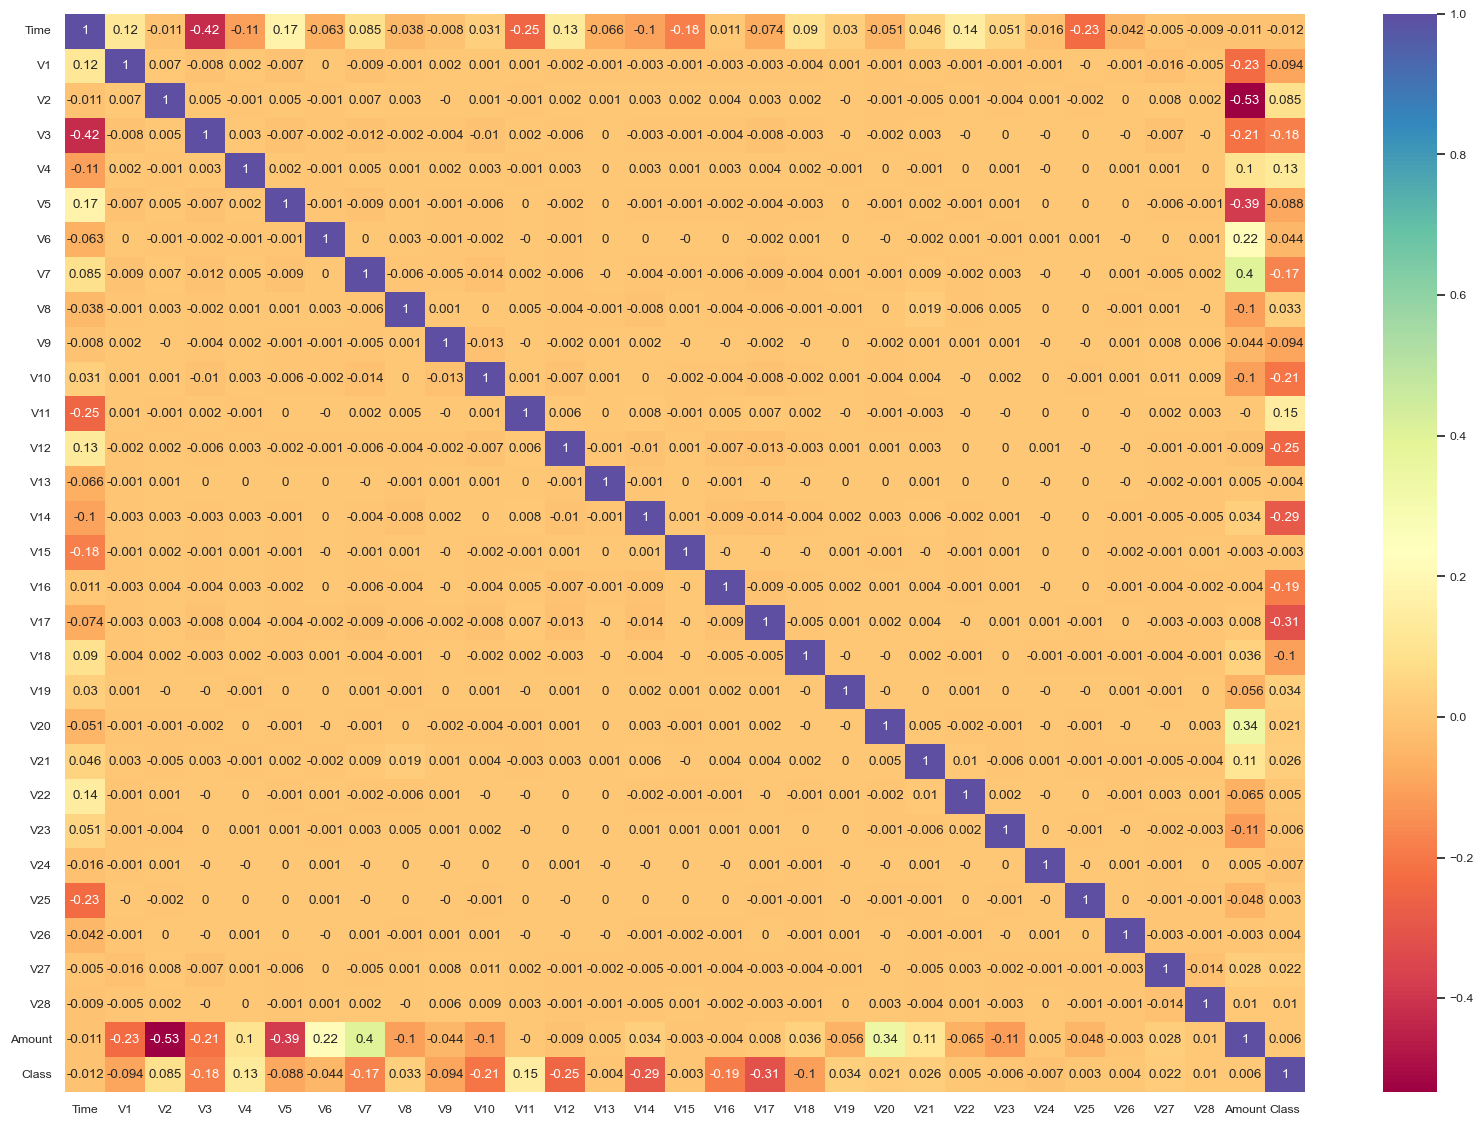

In [11]:
corr= round(df.corr(),3)
plt.figure(figsize=(20,14))
sns.set(font_scale=0.8)
sns.heatmap(corr, cmap = 'Spectral', annot = True)
plt.show()

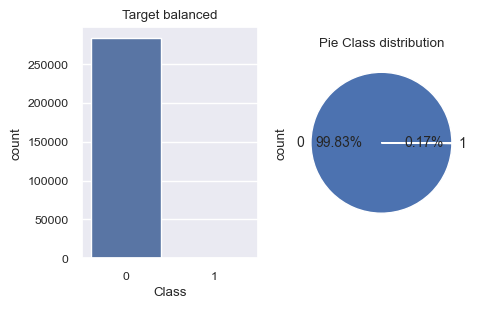

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (5,3))

sns.countplot(data = df, x = "Class", ax = ax1)
ax1.set_title("Target balanced");

pd.Series(df['Class']).value_counts().plot.pie(explode = [0, 0],
                                                 autopct = '%1.2f%%',
                                                 textprops = {'fontsize' : 10},
                                                 ax = ax2, title = 'Pie Class distribution');

In [13]:
rate = round(df.Class.value_counts().iloc[0] / df.Class.value_counts().iloc[1])
print()
print(f"False or 0: {df.Class.value_counts().iloc[0]}")
print(f"True or 1: {df.Class.value_counts().iloc[1]}")
print()
print(f"Target rate: 1:{rate}")


False or 0: 283253
True or 1: 473

Target rate: 1:599


##### Konkretno, postoji značajan disparitet između broja instanci označenih kao „Netačno” i onih označenih kao „Tačno” ili „1” Tačnije, za otprilike svakih 599 instanci označenih kao „Netačno” ili „0” samo je pojedinačna instanca kategorisan kao „Tačno“. Ova izražena neravnoteža u distribuciji klasa pruža snažne dokaze da se skup podataka klasifikuje kao veoma neuravnotežen.
##### Skup podataka u velikoj meri nagnut ka jednoj klasi, u ovom slučaju, klasi 'False' ili '0', dok klasa 'True' ili '1' predstavlja mali razlomak. Ova iskrivljena distribucija može da utiče na performanse algoritama za mašinsko učenje, čineći ih sklonijim predviđanju većinske klase, potencijalno zanemarujući nijanse manjinske klase.

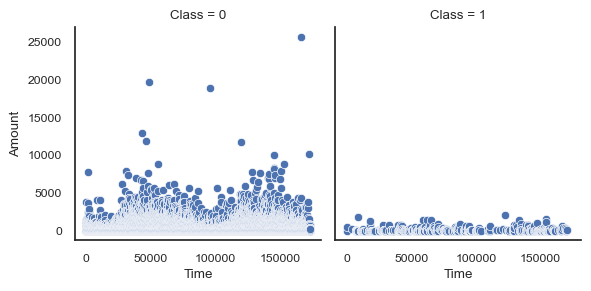

In [14]:
# Pogledajmo  pormenljive 'Time' i 'Amount'
sns.set_style(style='white')
facet_grid = sns.FacetGrid(data=df, col='Class')
facet_grid.map(sns.scatterplot, 'Time', 'Amount', palette='Paired_r')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [15]:
# Izbacimo kolone 'Time' i 'Amount'
df_copy = df.copy()
df_copy.drop('Time', axis = 1, inplace=True)
df_copy.drop('Amount', axis = 1, inplace=True)

In [16]:
df_copy.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Class  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 29 columns]

##### Podela podataka na zavisne (y) i nezavisne (X) promenljive

In [17]:
y = df_copy['Class']
X = df_copy.drop(['Class'], axis=1)

In [18]:
# Let's look at the descriptive statistics
X.describe()

V1             V2             V3             V4  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.005917      -0.004135       0.001613      -0.002966   
std         1.948026       1.646703       1.508682       1.414184   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.915951      -0.600321      -0.889682      -0.850134   
50%         0.020384       0.063949       0.179963      -0.022248   
75%         1.316068       0.800283       1.026960       0.739647   
max         2.454930      22.057729       9.382558      16.875344   

                  V5             V6             V7             V8  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.001828      -0.001139       0.001801      -0.000854   
std         1.377008       1.331931       1.227664       1.179054   
min      -113.743307     -26.160506     -43.557242     -73.216718   
25%        -0.689830      -0.769031      -0.552509      -0.208828   
50%        -0.053468      -0.275168       0.040859       0.021898   
75%         0.612218       0.396792       0.570474       0.325704   
max        34.801666      73.301626     120.589494      20.007208   

                  V9            V10  ...            V19            V20  \
count  283726.000000  283726.000000  ...  283726.000000  283726.000000   
mean       -0.001596      -0.001441  ...      -0.000264       0.000187   
std         1.095492       1.076407  ...       0.813379       0.769984   
min       -13.434066     -24.588262  ...      -7.213527     -54.497720   
25%        -0.644221      -0.535578  ...      -0.456289      -0.211469   
50%        -0.052596      -0.093237  ...       0.003367      -0.062353   
75%         0.595977       0.453619  ...       0.458508       0.133207   
max        15.594995      23.745136  ...       5.591971      39.420904   

                 V21            V22            V23            V24  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000371      -0.000015       0.000198       0.000214   
std         0.723909       0.724550       0.623702       0.605627   
min       -34.830382     -10.933144     -44.807735      -2.836627   
25%        -0.228305      -0.542700      -0.161703      -0.354453   
50%        -0.029441       0.006675      -0.011159       0.041016   
75%         0.186194       0.528245       0.147748       0.439738   
max        27.202839      10.503090      22.528412       4.584549   

                 V25            V26            V27            V28  
count  283726.000000  283726.000000  283726.000000  283726.000000  
mean       -0.000232       0.000149       0.001763       0.000547  
std         0.521220       0.482053       0.395744       0.328027  
min       -10.295397      -2.604551     -22.565679     -15.430084  
25%        -0.317485      -0.326763      -0.070641      -0.052818  
50%         0.016278      -0.052172       0.001479       0.011288  
75%         0.350667       0.240261       0.091208       0.078276  
max         7.519589       3.517346      31.612198      33.847808  

[8 rows x 28 columns]

##### Podaci izgledaju unapred skalirani. Nije potrebna dodatna predobrada.

In [19]:
cols = list(X.columns.values)

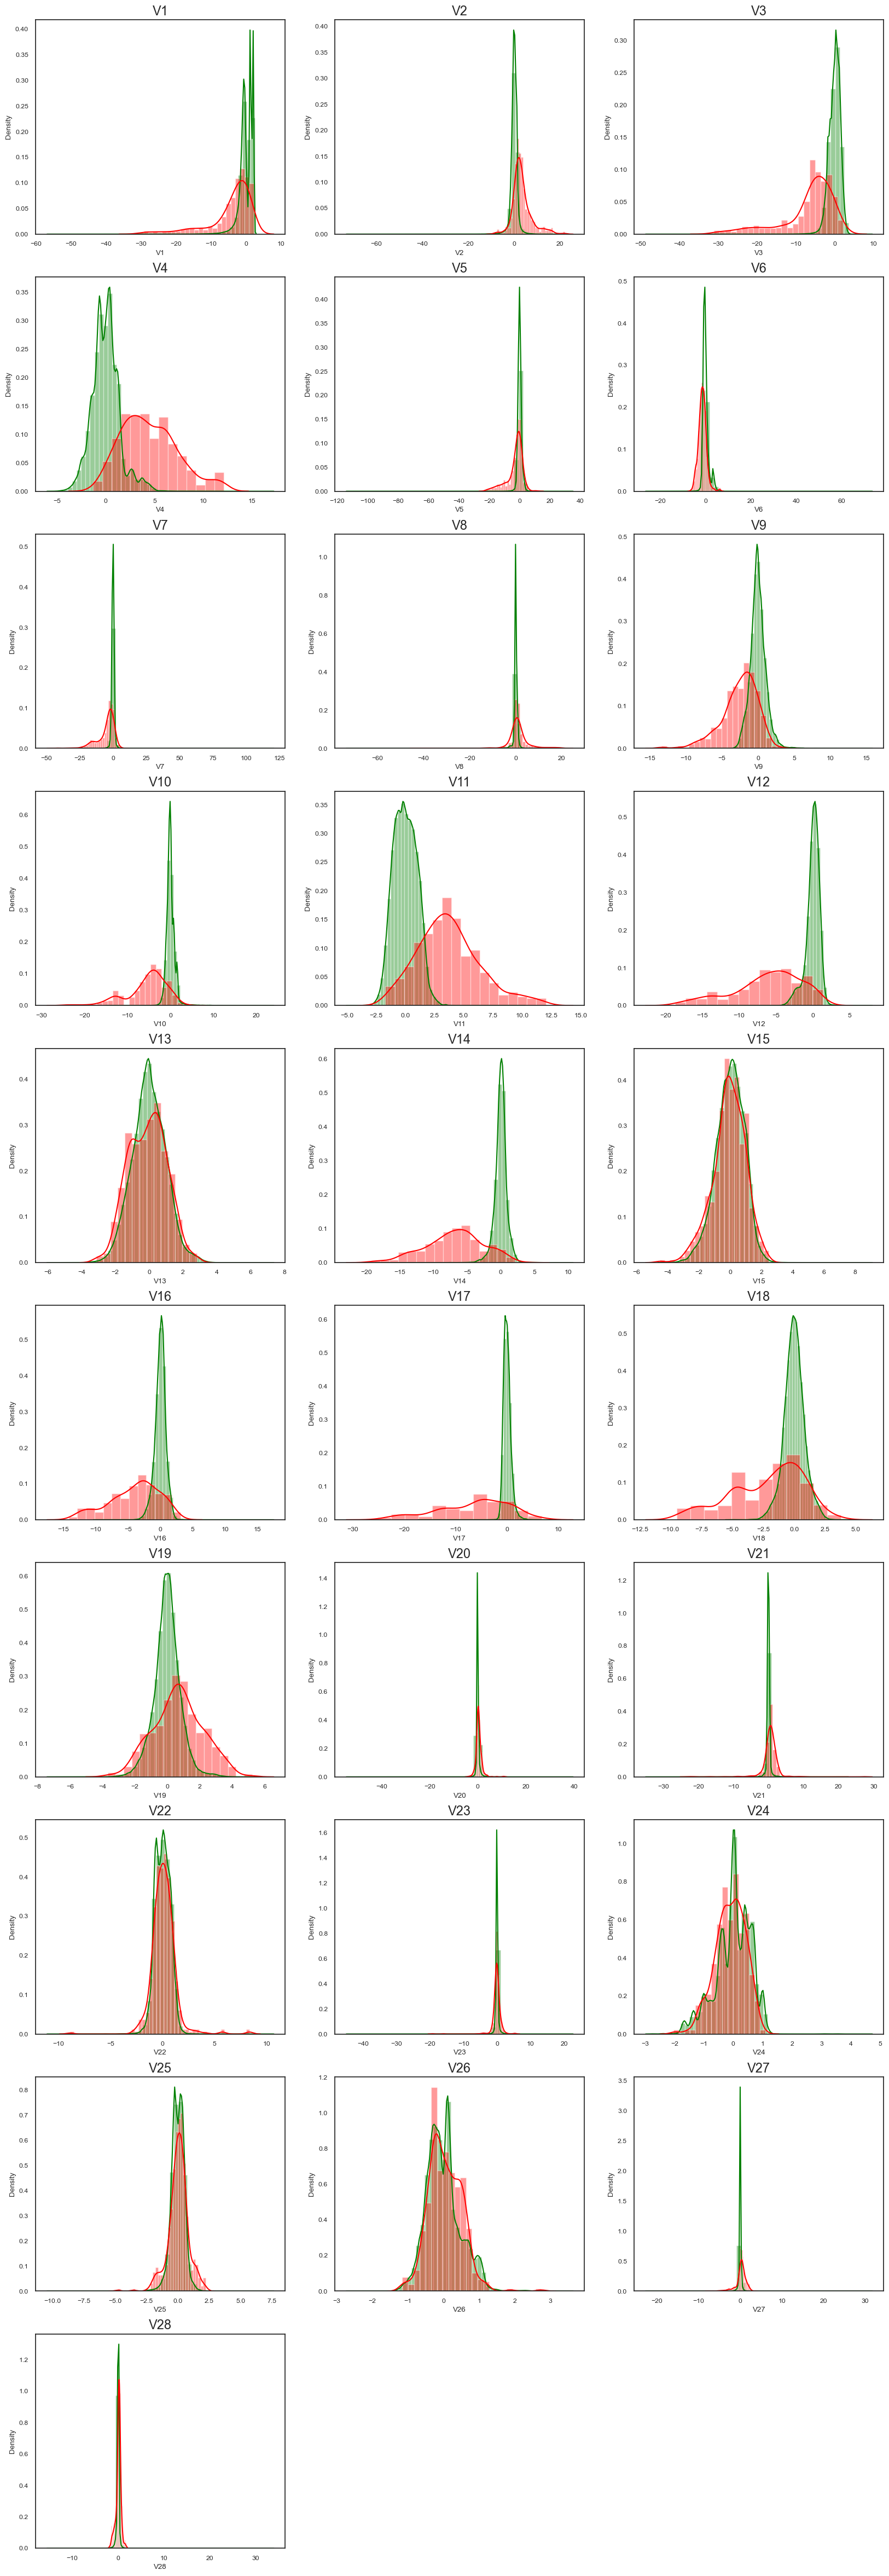

In [20]:
normal_records = df_copy.Class ==0
fraud_records = df_copy.Class == 1

plt.figure(figsize = (20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3, n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color = 'red')
  plt.title(col, fontsize=17)

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [22]:
y.info()

<class 'pandas.core.series.Series'>
Index: 283726 entries, 0 to 284806
Series name: Class
Non-Null Count   Dtype
--------------   -----
283726 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

Technique = list()
Type = list()
auc_score = list()
accuracy = list()
precision = list()
recall = list()
f1_Score = list()
training_duration = list()
algorithm_duration = list()

def split_data(X, y):
    return train_test_split(X, y, test_size = 0.1, random_state = RANDOM_STATE)

def scale_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

def train_model(X, y):
    model = RandomForestClassifier(random_state = RANDOM_STATE)
    model.fit(X, y)
    return model

def capture_metrics(model, X_test, y_test):
    prediction = model.predict(X_test)
    proba_prediction = model.predict_proba(X_test)
    
    return [roc_auc_score(y_test, proba_prediction[:,1]),
            accuracy_score(y_test, prediction),
           precision_score(y_test, prediction, average = 'binary'),
           recall_score(y_test, prediction, average = 'binary'),
           f1_score(y_test, prediction, average = 'binary')]

def get_results(X, y, TECHNIQUE_NAME: str, TECHNIQUE_TYPE: str):
    
    start = time.time()

    print("Scaling and splitting...")
    X = scale_data(X)
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    print("Training...")
    model = train_model(X_train, y_train)
    
    print("Metrics...")
    metrics = capture_metrics(model, X_test, y_test)
    
    Technique.append(TECHNIQUE_NAME)
    Type.append(TECHNIQUE_TYPE)
    auc_score.append(metrics[0])
    accuracy.append(metrics[1])
    precision.append(metrics[2])
    recall.append(metrics[3])
    f1_Score.append(metrics[4])
  
    cm = confusion_matrix(y_test, model.predict(X_test))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
  
    print("Complete!")
    
    end = time.time()
    time_taken = end - start
    print(f"Duration: {time_taken}")
    training_duration.append(time_taken)
    
def plot_target_balance(y, TECHNIQUE_NAME):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2, figsize = (7, 5))
    sns.countplot(x = df["Class"], ax = ax1)
    ax1.set_title("Original Target");
    pd.Series(df["Class"]).value_counts().plot.pie(explode = [0, 0], autopct = '%1.2f%%',
                                                     textprops = {'fontsize' : 10}, ax = ax2,
                                                     title = 'Original distribution')
    sns.countplot(x = y, ax = ax3)
    ax3.set_title(f"{TECHNIQUE_NAME} Target");
    pd.Series(y).value_counts().plot.pie(explode = [0, 0], autopct = '%1.2f%%',
                                         textprops = {'fontsize' : 10}, ax = ax4,
                                         title = f"{TECHNIQUE_NAME} distribution")
    ax1.grid(False)
    ax3.grid(False)
    plt.tight_layout();
    
    
def plot_scatter(X, y, TECHNIQUE_NAME):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, sharey = False, figsize = (10, 4))
    sns.scatterplot(data = df, x = "V4", y = "V2", hue = "Class", ax = ax1)
    ax1.set_title("Original distribution")
    sns.scatterplot(data = pd.concat([X, 
                                 y], axis = 1),
                    x = "V4", y = "V2", hue = "Class", ax = ax2)
    ax1.grid(False)
    ax2.grid(False)
    ax2.set_title(f"{TECHNIQUE_NAME} distribution");
    
    
def create_summary():
    return pd.DataFrame({"Technique" : Technique, "Type": Type, "AUC SCORE" : auc_score,
                         "Accuracy" : accuracy, "Precision" : precision, "Recall" : recall,
                         "F1 Score" : f1_Score, "Time to transform": algorithm_duration, "Training time":training_duration})

#### Test sa originalnim podacima

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 294.08182096481323


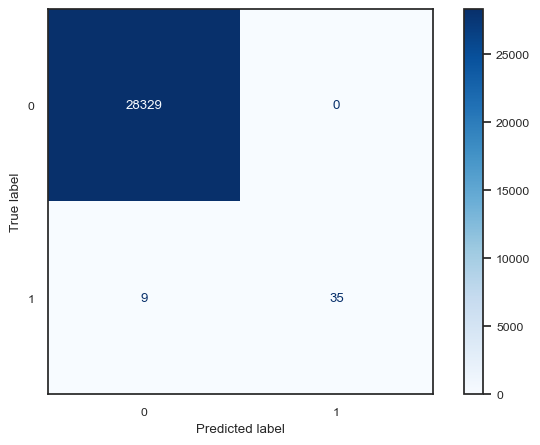

In [24]:
get_results(X, y, TECHNIQUE_NAME = "Original data", TECHNIQUE_TYPE = "Normal data")

algorithm_duration.append(0.0)

### Undersampling

Undersampling je strategija koja se primenjuje u kontekstu neuravnoteženih skupova podataka kako bi se rešila nesrazmerna raspodela klasa. Ova strategija podrazumeva smanjenje broja instanci koje pripadaju većinskoj klasi, čime se stvara uravnoteženija reprezentacija obe klase. Na ovaj način, undersampling ima za cilj da smanji uticaj dominantne klase na proces učenja modela i podstakne model da bolje prepozna obrasce u manjinskoj klasi.

### Random under-sampling

Proces nasumičnog undersamplinga podrazumeva nasumično odabiranje instanci iz većinske klase sve dok se ne postigne željena ravnoteža. Međutim, iako nasumični undersampling može poboljšati performanse modela na manjinskoj klasi, on nosi i potencijalne nedostatke. Odbacivanjem značajnog dela podataka iz većinske klase, model može izgubiti dragocene informacije i nijanse prisutne u originalnoj raspodeli podataka.

In [25]:
from imblearn.under_sampling import RandomUnderSampler

algorithm_start = time.time()

rus = RandomUnderSampler(sampling_strategy = 'auto',
    random_state = RANDOM_STATE,
    replacement = True)

X_resampled, y_resampled = rus.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

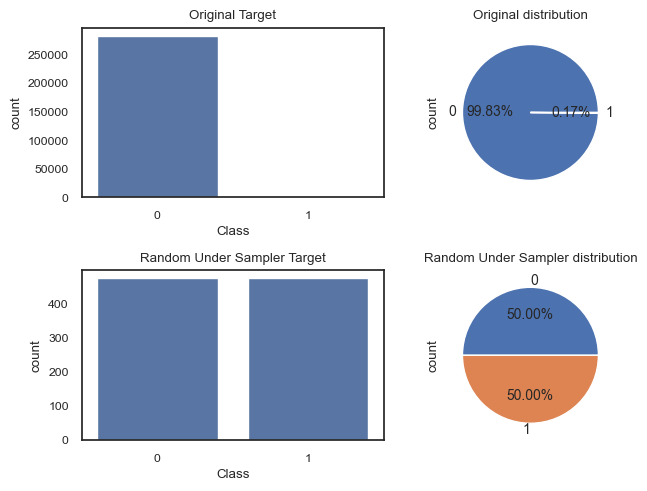

In [26]:
plot_target_balance(y_resampled, "Random Under Sampler")

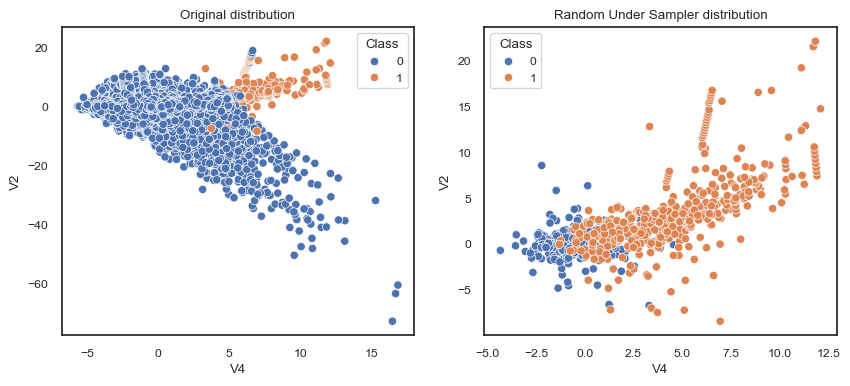

In [27]:
plot_scatter(X_resampled, y_resampled, "Random Under Sampler")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 0.35100317001342773


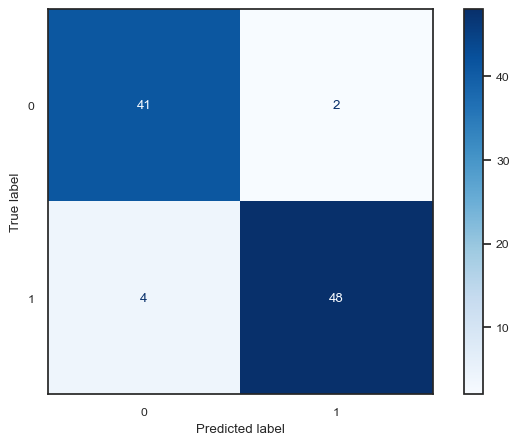

In [28]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "Random Under Sampler",
            TECHNIQUE_TYPE = "Undersampling")

### Condensed Nearest Neighbor(CNN)

Glavni cilj CNN-a je da se kreira smanjeni skup podataka za obuku koji očuvava sposobnost tačne klasifikacije novih instanci. Ova metoda funkcioniše na osnovu principa odbacivanja instanci koje ne doprinose dodatnim informacijama u procesu klasifikacije, čime se pojednostavljuje skup podataka, a njegova klasifikaciona tačnost se održava.

In [29]:
from imblearn.under_sampling import CondensedNearestNeighbour

algorithm_start = time.time()

cnn = CondensedNearestNeighbour(sampling_strategy='auto', n_jobs=-1)
X_resampled, y_resampled = cnn.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

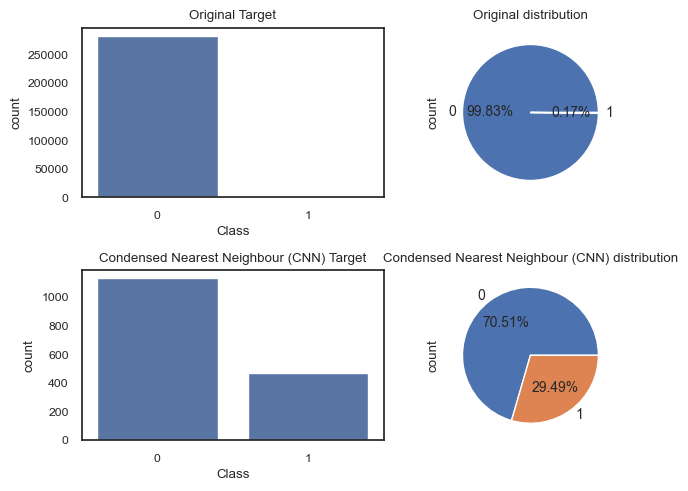

In [30]:
plot_target_balance(y_resampled, "Condensed Nearest Neighbour (CNN)")

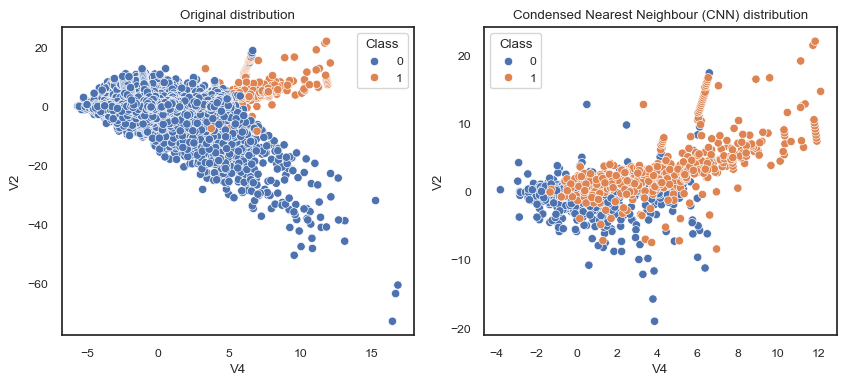

In [31]:
plot_scatter(X_resampled, y_resampled, "Condensed Nearest Neighbour (CNN)")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 0.7954239845275879


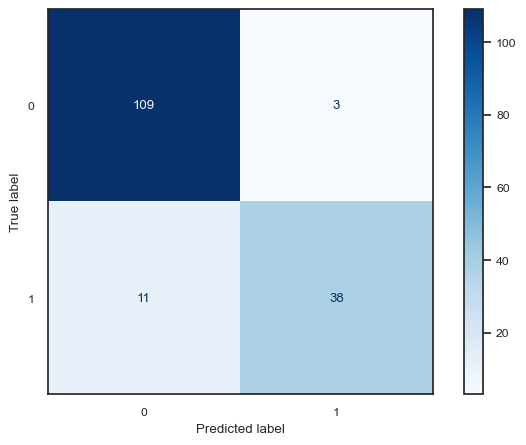

In [32]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME="Condensed Nearest Neighbour (CNN)", 
            TECHNIQUE_TYPE="Undersampling")

### Tomek Links

Tomek Links se koristi za identifikaciju i uklanjanje instanci koje bi mogle doprineti preklapanju između klasa i potencijalno uzrokovati pogrešnu klasifikaciju ili nejasne granice odluke.

U postavci binarne klasifikacije, Tomek Link je par instanci, jedna iz svake klase, koje su najbliži susedi jedna drugoj. Međutim, one pripadaju različitim klasama. Ideja je da se ove instance nalaze blizu granice odluke, što ih čini podložnim pogrešnoj klasifikaciji od strane klasifikatora. Uklanjanjem instanci koje formiraju Tomek Linkove, namera je stvoriti jasniju separaciju između klasa i potencijalno poboljšati performanse algoritama za klasifikaciju.

In [33]:
from imblearn.under_sampling import TomekLinks

algorithm_start = time.time()

tl = TomekLinks(sampling_strategy = 'auto', n_jobs = -1)  

X_resampled, y_resampled = tl.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

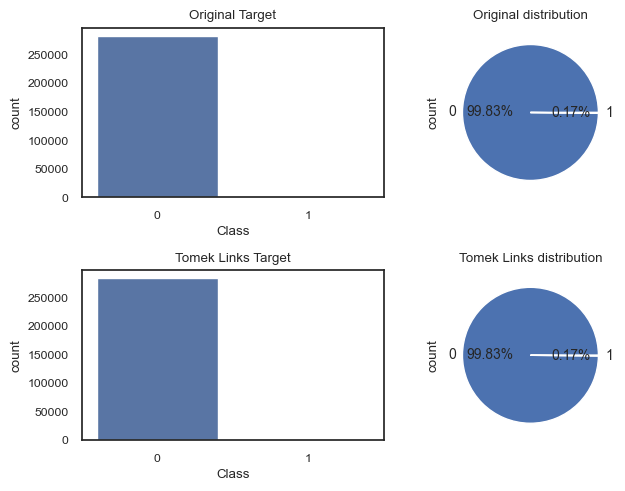

In [34]:
plot_target_balance(y_resampled, "Tomek Links")

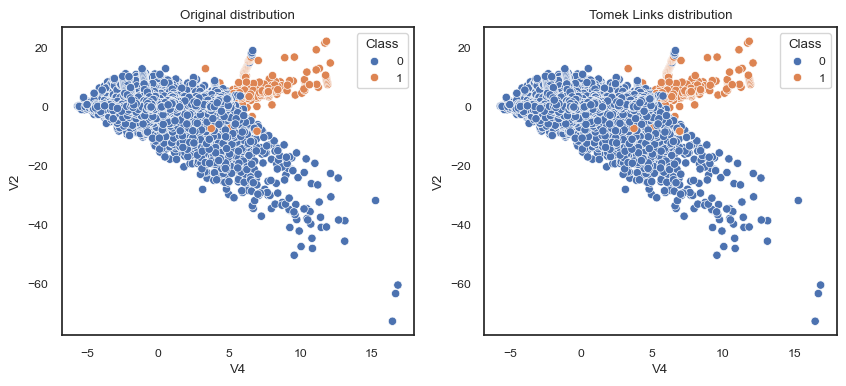

In [35]:
plot_scatter(X_resampled, y_resampled, "Tomek Links")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 270.2963318824768


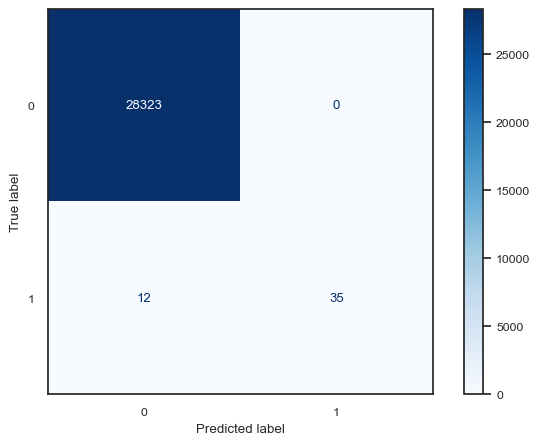

In [36]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "Tomek Links",
            TECHNIQUE_TYPE = "Undersampling")

### One sided selection

One-Sided Selection nudi kompromis između prednosti tehnika undersamplinga i oversamplinga. Smanjuje uticaj većinske klase na model, dok zadržava važne instance iz obe klase. Ovo može potencijalno dovesti do poboljšane generalizacije i performansi na manjinskoj klasi, bez žrtvovanja ukupne raznolikosti skupa podataka.

In [37]:
from imblearn.under_sampling import OneSidedSelection

algorithm_start = time.time()

oss = OneSidedSelection(sampling_strategy = 'auto', random_state = RANDOM_STATE, n_jobs = -1)

X_resampled, y_resampled = oss.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

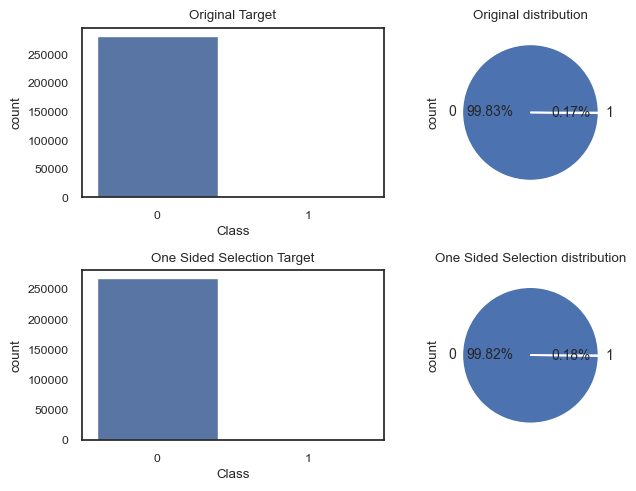

In [38]:
plot_target_balance(y_resampled, "One Sided Selection")

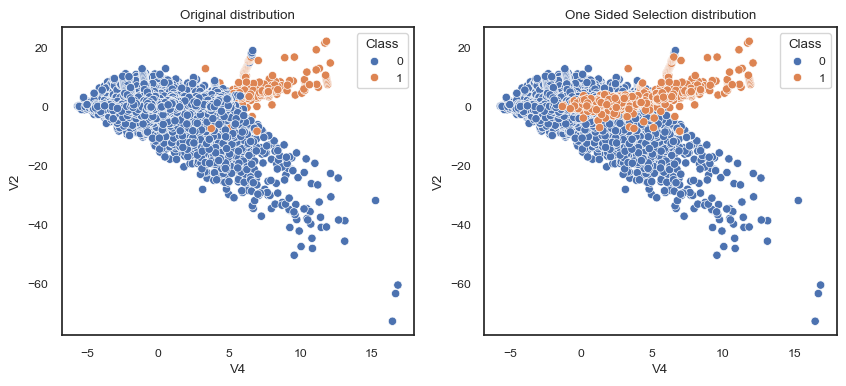

In [39]:
plot_scatter(X_resampled, y_resampled, "One Sided Selection")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 283.9407260417938


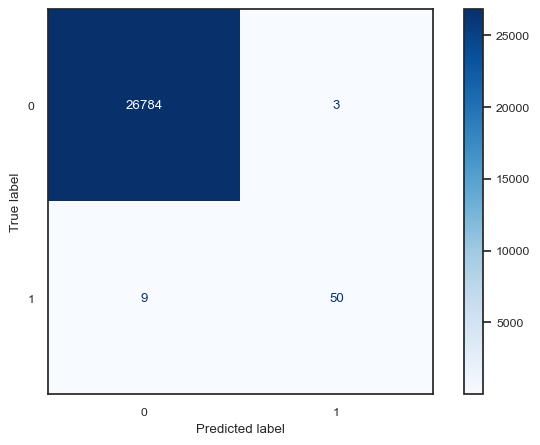

In [40]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "One Sided Selection",
            TECHNIQUE_TYPE = "Undersampling")

### Edited NN

Primarni cilj ENN-a je eliminacija instanci koje su potencijalno pogrešno klasifikovane ili mogu uvesti šum u proces treniranja. ENN je posebno koristan kada dataset sadrži instance koje se nalaze blizu granica odluke između klasa i koje su sklone pogrešnoj klasifikaciji. Uklanjanjem takvih instanci može se postići jasnija separacija klasa i preciznije modeliranje osnovne raspodele podataka. 

In [41]:
from imblearn.under_sampling import EditedNearestNeighbours

algorithm_start = time.time()

enn = EditedNearestNeighbours(sampling_strategy = 'auto',
                             kind_sel = 'all', n_jobs = -1)

X_resampled, y_resampled = enn.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

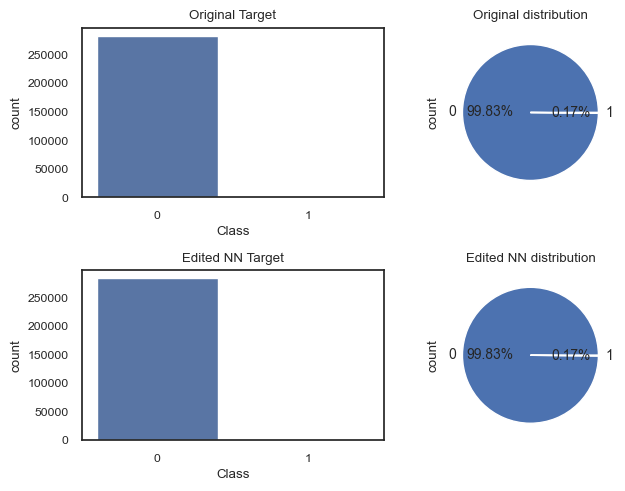

In [42]:
plot_target_balance(y_resampled, "Edited NN")

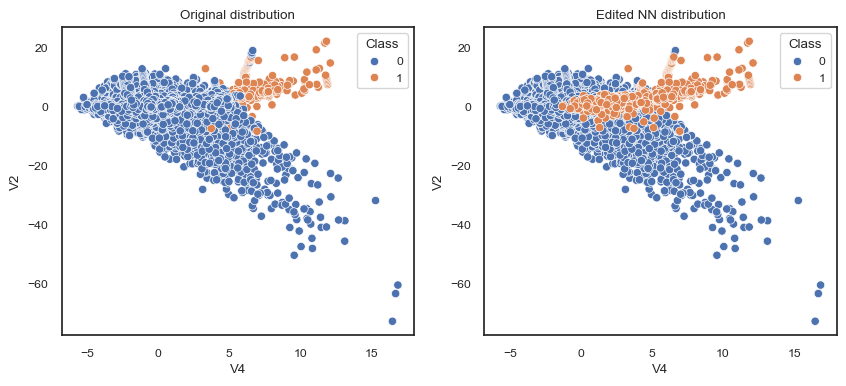

In [43]:
plot_scatter(X_resampled, y_resampled, "Edited NN")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 252.47963690757751


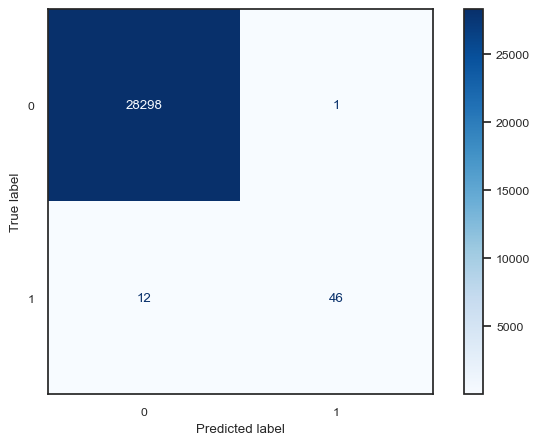

In [44]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "Edited NN",
            TECHNIQUE_TYPE = "Undersampling")

### Repeated Edited NN

Ponavljanjem ENN procedure više puta, RENN nastoji da poboljša robustnost čišćenja skupa podataka i stvori rafiniraniji skup za treniranje koji poboljšava ukupne performanse mašinskih modela.

RENN je posebno koristan kod skupova podataka koji sadrže značajan šum ili pogrešne klasifikacije, posebno one koje možda neće biti u potpunosti rešene jednokratnom primenom ENN-a. Iterativna priroda RENN-a omogućava mu da postepeno eliminiše pogrešno klasifikovane instance i poboljša kvalitet skupa podataka, što vodi ka boljoj generalizaciji modela.

In [45]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

algorithm_start = time.time()

renn = RepeatedEditedNearestNeighbours(sampling_strategy = 'auto', kind_sel = 'all',
                                       n_jobs = -1, max_iter = 100)

X_resampled, y_resampled = renn.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)


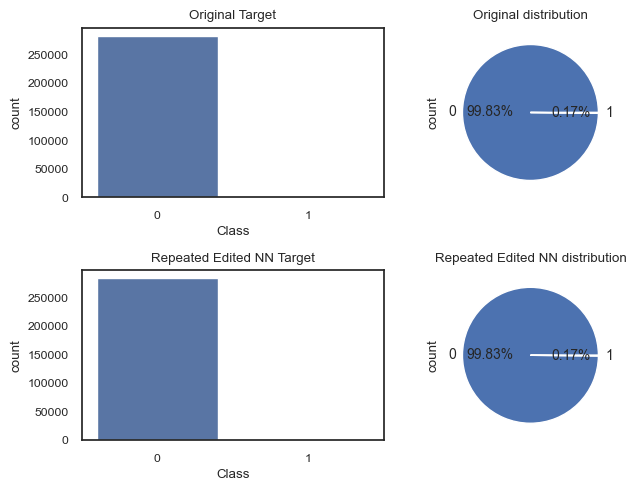

In [46]:
plot_target_balance(y_resampled, "Repeated Edited NN")

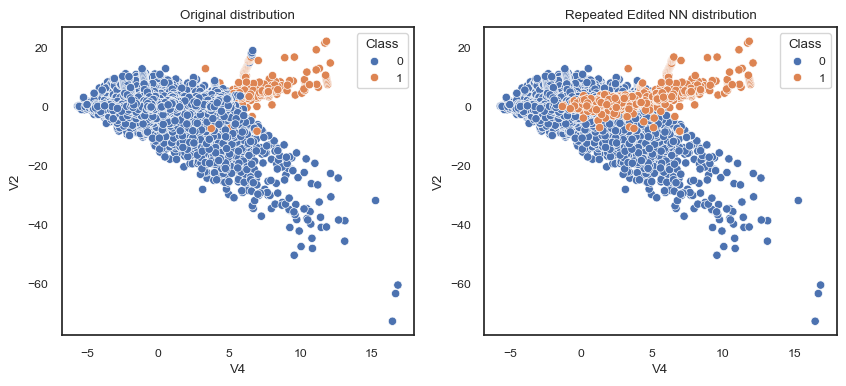

In [47]:
plot_scatter(X_resampled, y_resampled, "Repeated Edited NN")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 269.4320888519287


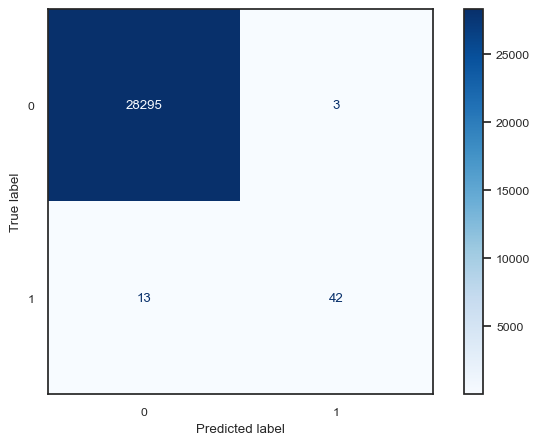

In [48]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "Repeated Edited NN",
            TECHNIQUE_TYPE = "Undersampling")

### All KNN

All KNN je osmišljen da identifikuje instance koje su okružene instancama različite klase, što može dovesti do pogrešnih klasifikacija ili šuma u procesu treniranja. Analizom klasa k najbližih suseda za svaku instancu, All KNN nastoji da donese informisane odluke o uklanjanju instanci kako bi poboljšao ukupni kvalitet skupa podataka.

All KNN deli sličnosti sa tehnikama kao što su Edited Nearest Neighbors (ENN) i Repeated Edited Nearest Neighbors (RENN), ali razmatra ceo skup podataka i njegove susede kolektivno, umesto da se fokusira na pojedinačne instance.

In [49]:
from imblearn.under_sampling import AllKNN

algorithm_start = time.time()

allknn = AllKNN(sampling_strategy = 'auto', kind_sel = 'all',
                n_jobs = -1)

X_resampled, y_resampled = allknn.fit_resample(X, y)


algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

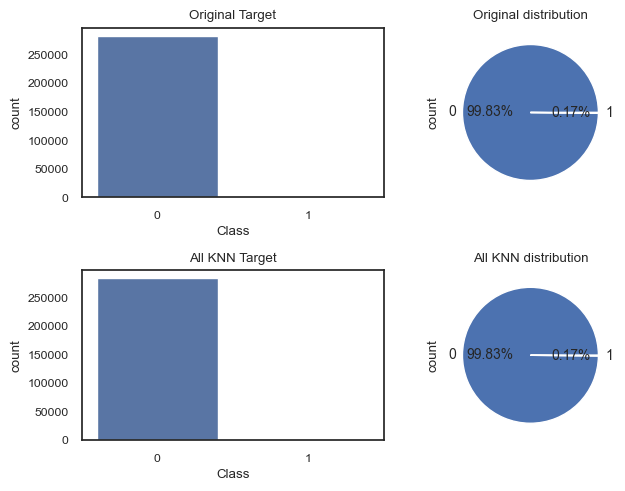

In [50]:
plot_target_balance(y_resampled, "All KNN")

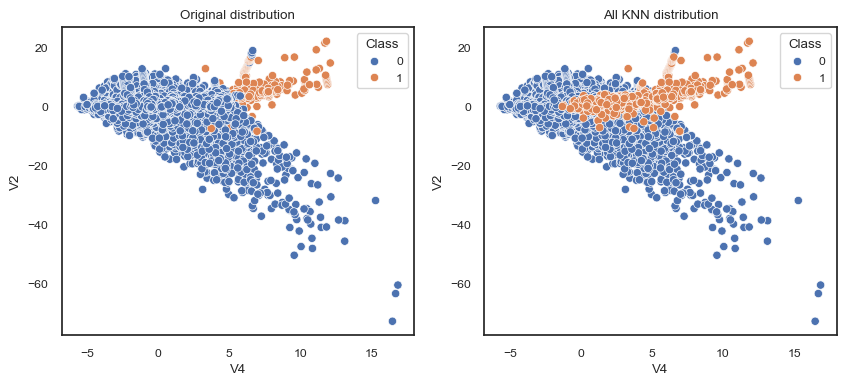

In [51]:
plot_scatter(X_resampled, y_resampled, "All KNN")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 267.27829813957214


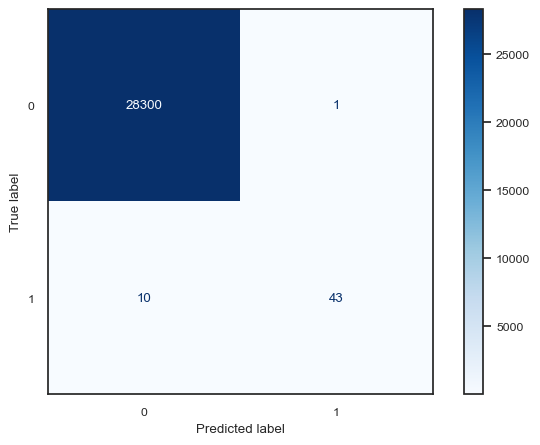

In [52]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "All KNN",
            TECHNIQUE_TYPE = "Undersampling")

### Neighbourhood Cleaning Rule

Neighbourhood Cleaning Rule (NCL) primenjuje sofisticiraniji pristup u poređenju sa osnovnim metodama selekcije instanci. Evaluacijom instanci na osnovu klasa njihovih k najbližih suseda, NCL nastoji da eliminiše instance koje su blizu granica između klasa i koje mogu uneti nesigurnost ili šum u model. Prednost NCL-a leži u njegovoj sposobnosti da se nosi sa izazovima koje postavljaju instance koje su blizu granica odlučivanja između klasa. Takve instance mogu imati značajan uticaj na ponašanje modela, a NCL nastoji da smanji ovaj uticaj fokusirajući se na instance koje su okružene instancama suprotne klase.

In [53]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

algorithm_start = time.time()

ncr = NeighbourhoodCleaningRule(sampling_strategy = 'auto', kind_sel = 'all',
                                n_jobs = -1) 

X_resampled, y_resampled = ncr.fit_resample(X, y)


algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

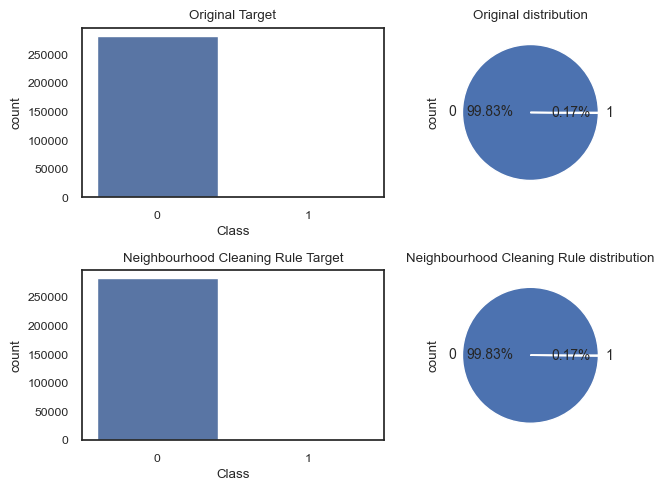

In [54]:
plot_target_balance(y_resampled, "Neighbourhood Cleaning Rule")

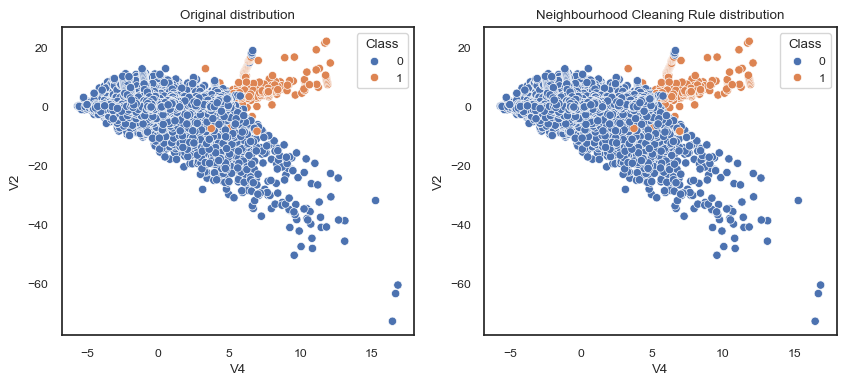

In [55]:
plot_scatter(X_resampled, y_resampled, "Neighbourhood Cleaning Rule")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 272.63274478912354


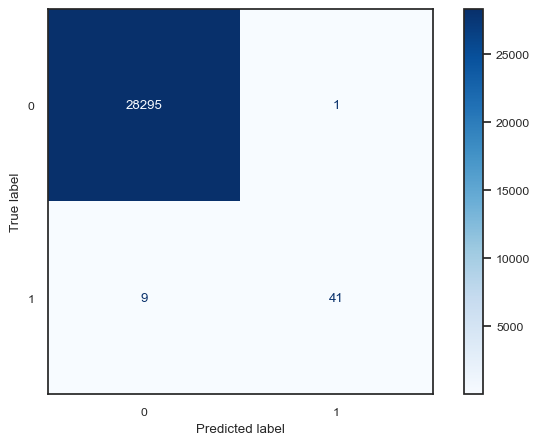

In [56]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "Neighbourhood Cleaning Rule",
            TECHNIQUE_TYPE = "Undersampling")

### NearMiss

NearMiss algoritam ima različite varijacije, od kojih svaka koristi malo drugačiji pristup:

1. NearMiss-1: Za svaku instancu u većinskoj klasi, bira instance iz manjinske klase koje imaju najmanju prosečnu distancu do nje. Ova metoda ima za cilj selekciju instanci iz manjinske klase koje su najbliže granici odlučivanja.

2. NearMiss-2: Fokusira se na instance u većinskoj klasi koje su najdalje od granice odlučivanja i bira sve instance iz manjinske klase. Ova metoda ima za cilj zadržavanje instanci iz većinske klase koje su udaljenije od manjinske klase.

3. NearMiss-3: Ova varijanta kombinuje aspekte NearMiss-1 i NearMiss-2. Njena svrha je stvaranje balansa između uklanjanja instanci koje su previše udaljene od manjinske klase i onih koje su previše blizu.

Primarni cilj NearMiss metode je smanjenje uticaja većinske klase na proces učenja i stvaranje ravnopravnije reprezentacije obe klase. Selektivnim izborom instanci iz većinske klase koje su najinformativnije ili reprezentativne, NearMiss pokušava poboljšati performanse algoritama za klasifikaciju, posebno u odnosu na manjinsku klasu.

In [57]:
from imblearn.under_sampling import NearMiss

algorithm_start = time.time()

nm1 = NearMiss(sampling_strategy = 'auto', version = 1, n_jobs = -1)

X_resampled, y_resampled = nm1.fit_resample(X, y)


algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

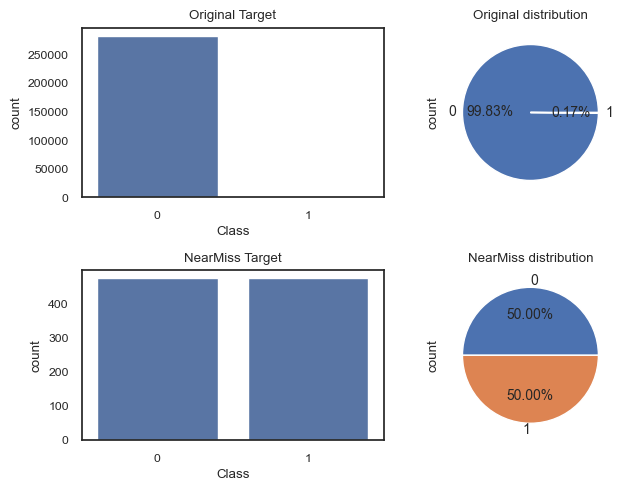

In [58]:
plot_target_balance(y_resampled, "NearMiss")

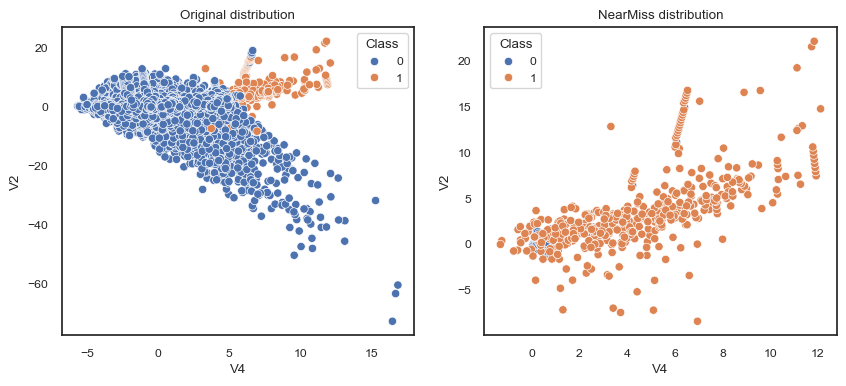

In [59]:
plot_scatter(X_resampled, y_resampled, "NearMiss")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 0.514185905456543


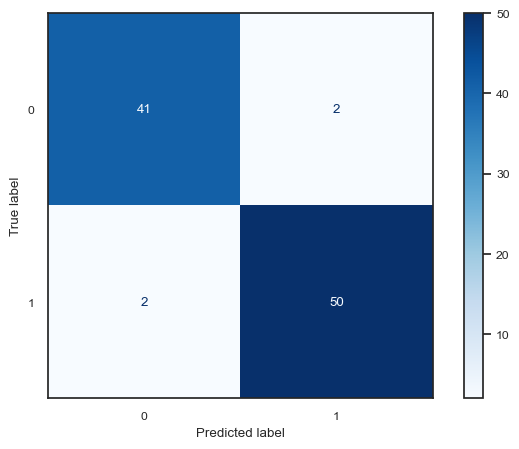

In [60]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "NearMiss",
            TECHNIQUE_TYPE = "Undersampling")

### Instance Hardness Filtering

Ključna ideja iza IHF-a je fokusiranje na instance koje pružaju najvrednije prilike za učenje modelu. Filtriranjem instanci koje su lako klasifikovane, model može da se koncentriše na poboljšanje performansi na izazovnim instancama, koje su često blizu granica odlučivanja ili pripadaju manjinskoj klasi u neuravnoteženim skupovima podataka.

IHF može biti posebno koristan kada se radi sa skupovima podataka koji imaju značajnu količinu šuma ili pogrešnog označavanja, jer usmerava pažnju modela ka instancama koje zahtevaju pažljivije razmatranje. Međutim, određivanje odgovarajućeg praga za skorove instanci i razumevanje karakteristika "teških" instanci su važni aspekti za efektivnu primenu IHF-a.

In [61]:
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.ensemble import RandomForestClassifier

algorithm_start = time.time()

iht = InstanceHardnessThreshold(estimator = RandomForestClassifier(),
    sampling_strategy = 'auto', random_state = RANDOM_STATE,
    n_jobs = -1)

X_resampled, y_resampled = iht.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

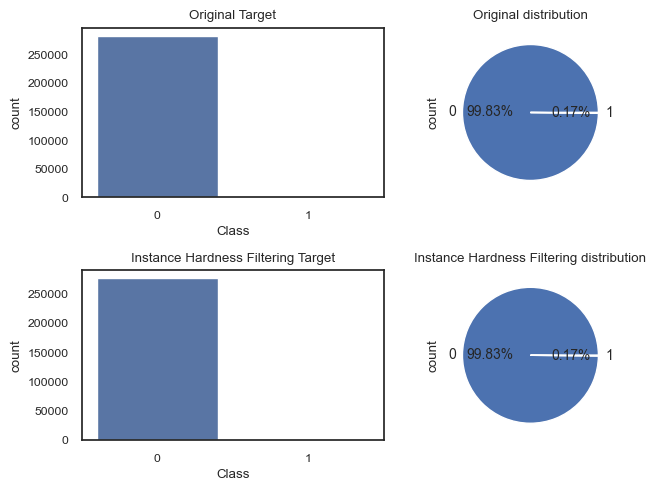

In [62]:
plot_target_balance(y_resampled, "Instance Hardness Filtering")

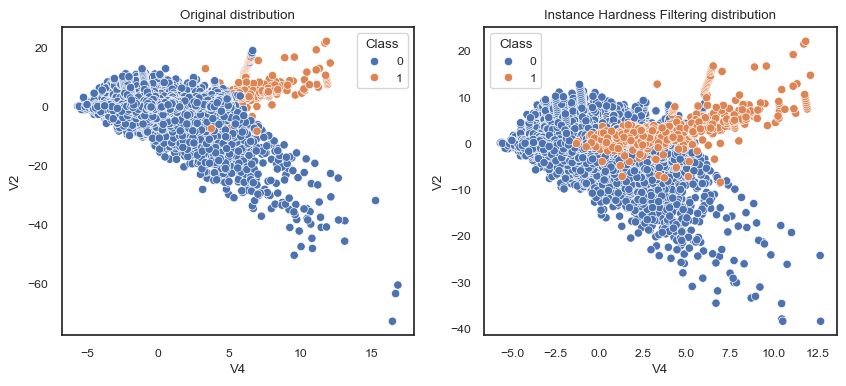

In [63]:
plot_scatter(X_resampled, y_resampled, "Instance Hardness Filtering")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 258.2388370037079


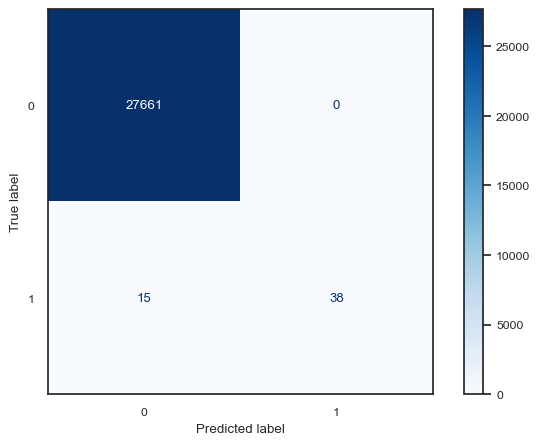

In [64]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "Instance Hardness Filtering",
            TECHNIQUE_TYPE = "Undersampling")

### Oversampling

Tehnika oversampliranja rešava ovaj problem povećanjem broja instanci manjinske klase u skupu podataka. Ovaj proces uključuje kreiranje duplikata ili sintetičkih instanci postojećih primera manjinske klase, čime se efektivno povećava njihova zastupljenost. Uvođenjem više instanci iz manjinske klase, algoritam za učenje može bolje razumeti karakteristike i obrasce specifične za tu klasu, što dovodi do tačnijih predikcija.

### Random over-sampling

Randomno oversampliranje uključuje nasumično dupliranje postojećih instanci iz manjinske klase kako bi se izbalansirala distribucija klasa i obezbedilo da algoritam za učenje ima više primera iz nedovoljno zastupljene klase. Identifikuju se instance koje pripadaju manjinskoj klasi (klasi sa manjim brojem uzoraka) u skupu podataka. Nasumično se biraju instance iz manjinske klase i dupliraju. Broj puta koliko se svaka instanca duplira zavisi od toga koliko se oversampliranje želi postići. Rezultat randomnog oversampliranja je novi skup podataka u kojem su instance manjinske klase duplirane, stvarajući uravnoteženiju distribuciju klasa. Prekomerno dupliranje instanci manjinske klase može dovesti do prekomernog prilagođavanja (overfitting), naročito ako duplirane instance ne odražavaju stvarnu distribuciju podataka u toj klasi. Pored toga, randomno oversampliranje može povećati i računarske zahteve, jer skup podataka postaje veći zbog dupliranja.

In [65]:
from imblearn.over_sampling import RandomOverSampler

algorithm_start = time.time()

ros = RandomOverSampler(sampling_strategy = 'auto',
 random_state = RANDOM_STATE)  

X_resampled, y_resampled = ros.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

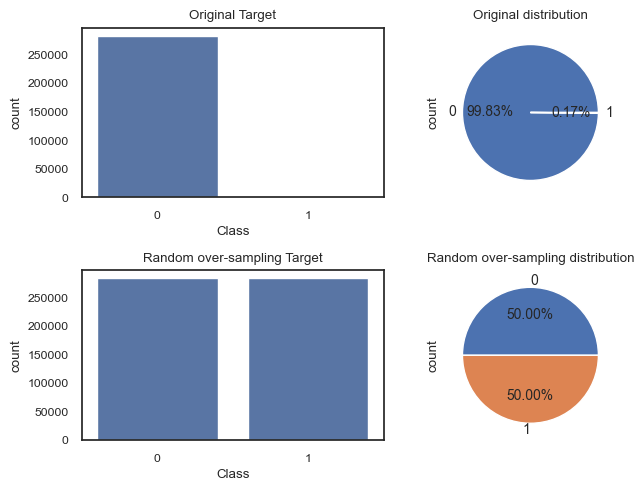

In [66]:
plot_target_balance(y_resampled, "Random over-sampling")

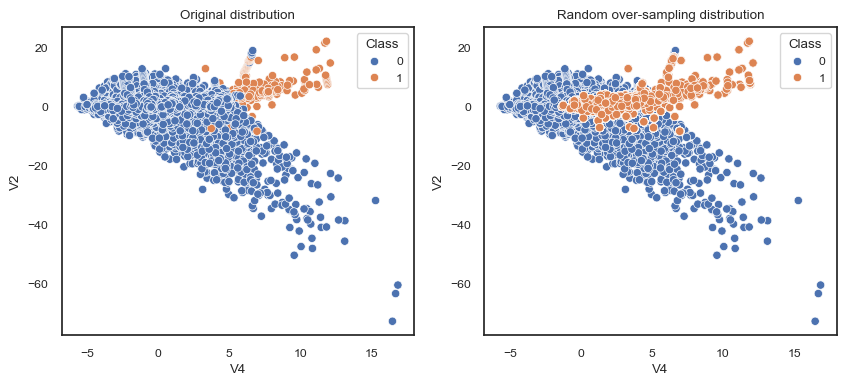

In [67]:
plot_scatter(X_resampled, y_resampled, "Random over-sampling")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 245.36286115646362


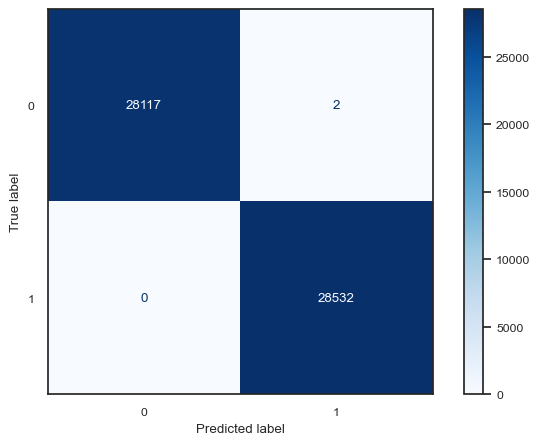

In [68]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "Instance Hardness Filtering",
            TECHNIQUE_TYPE = "Oversampling")

### SMOTE

SMOTE, što znači Synthetic Minority Over-sampling Technique (Tehnika sintetičkog manjinskog oversampliranja), je napredna tehnika oversampliranja. Za razliku od jednostavnog randomnog oversampliranja, koje podrazumeva dupliranje postojećih instanci, SMOTE generiše sintetičke instance za manjinsku klasu interpolacijom između postojećih instanci, čime se stvara uravnoteženija distribucija klasa. Međutim, važno je napomenuti da SMOTE možda neće biti efikasan u slučajevima gde je distribucija manjinske klase kompleksna ili sadrži outlier-e (izuzetke).

In [69]:
from imblearn.over_sampling import SMOTE

algorithm_start = time.time()

sm = SMOTE(sampling_strategy = 'auto',
 random_state = RANDOM_STATE, n_jobs = -1)

X_resampled, y_resampled = sm.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

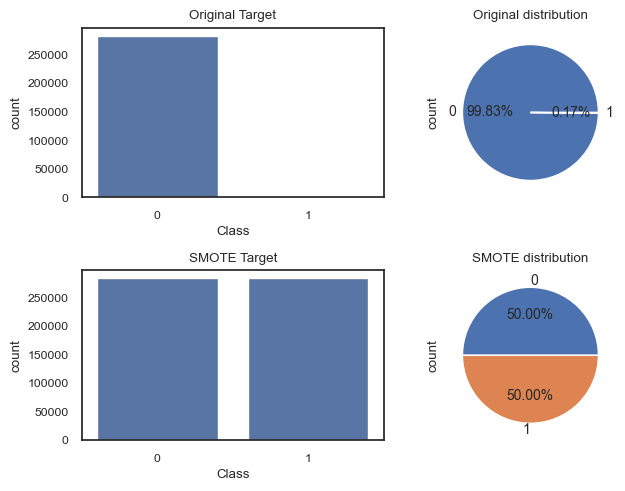

In [70]:
plot_target_balance(y_resampled, "SMOTE")

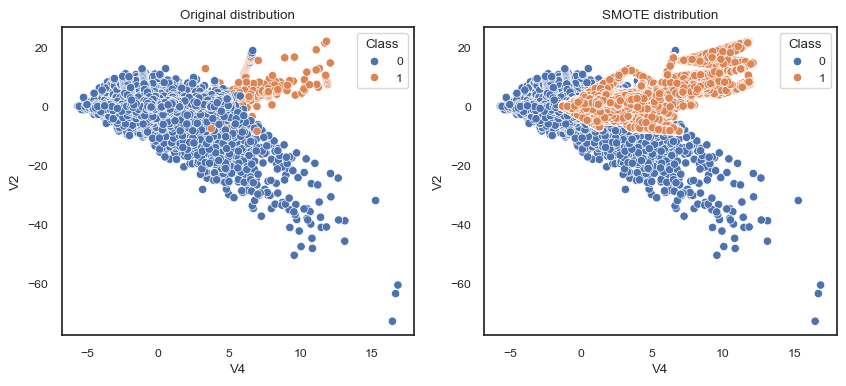

In [71]:
plot_scatter(X_resampled, y_resampled, "SMOTE")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 450.65774393081665


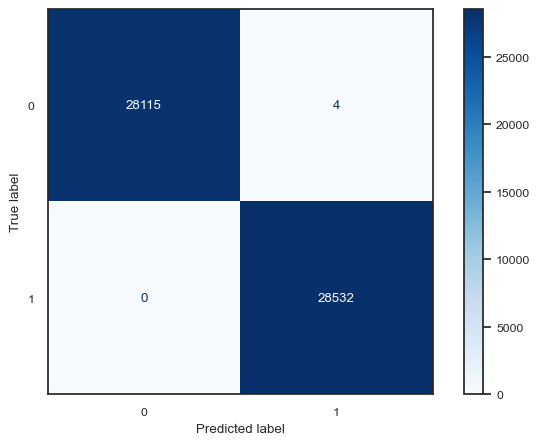

In [72]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "SMOTE",
            TECHNIQUE_TYPE = "Oversampling")

### SMOTE-N

Kod skupova podataka sa nominalnim atributima, tradicionalne tehnike oversampliranja, poput nasumičnog dupliranja, mogu dovesti do stvaranja nerealnih ili neodrživih instanci. SMOTE-N rešava ovaj problem tako što osigurava da generisane sintetičke instance održavaju distribuciju kategorijskih atributa, dok istovremeno efikasno povećava broj instanci manjinske klase. Ključna inovacija u SMOTE-N je njegova sposobnost da generiše sintetičke instance koje poštuju distribuciju nominalnih atributa. SMOTE-N je posebno koristan kada se radi sa skupovima podataka koji sadrže kategorijske atribute, kao što su tekstualni podaci, odgovori iz anketa ili nominalne promenljive.

In [73]:
from imblearn.over_sampling import SMOTEN

algorithm_start = time.time()

sampler = SMOTEN(sampling_strategy = 'auto', random_state = RANDOM_STATE, n_jobs = -1)

X_resampled, y_resampled = sampler.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

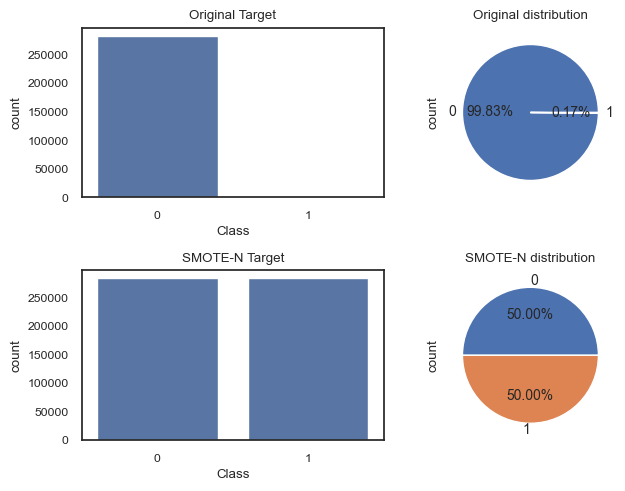

In [74]:
plot_target_balance(y_resampled, "SMOTE-N")

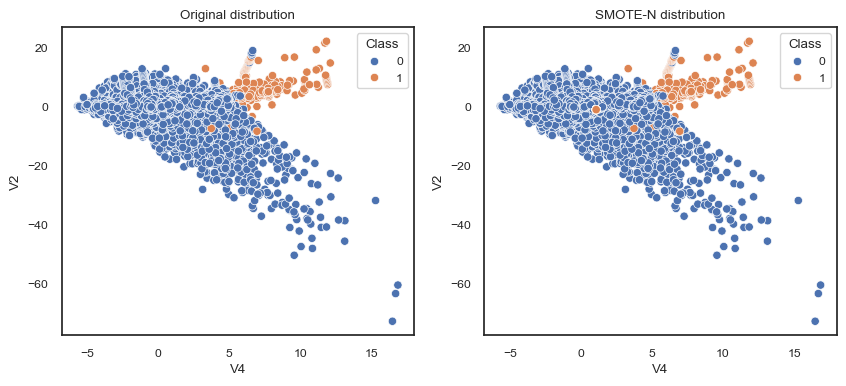

In [75]:
plot_scatter(X_resampled, y_resampled, "SMOTE-N")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 293.3559229373932


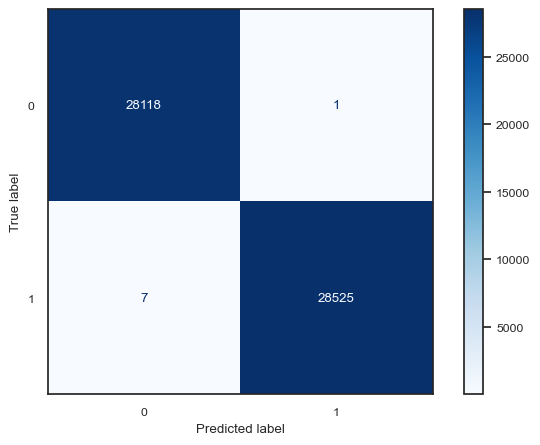

In [76]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "SMOTE-N",
            TECHNIQUE_TYPE = "Oversampling")

### ADASYN

Ključni princip ADASYN-a je da posveti više pažnje onim instancama u manjinskoj klasi koje su izazovnije za klasifikaciju zbog njihove blizine granici odluke. Fokusiranjem na ove izazovne instance, ADASYN ima za cilj da stvori sintetičke instance koje bolje predstavljaju složenost distribucije podataka, čime se na kraju poboljšava performansa modela. Prilagodljiva priroda ADASYN-a ga čini posebno efikasnim u radu sa skupovima podataka koji imaju složene granice odluke ili različite nivoe težine među instancama. 

In [77]:
from imblearn.over_sampling import ADASYN

algorithm_start = time.time()

ada = ADASYN(sampling_strategy = 'auto', random_state = RANDOM_STATE, n_jobs = 4)

X_resampled, y_resampled = ada.fit_resample(X, y)

algorithm_end = time.time()

algorithm_duration.append(algorithm_end - algorithm_start)

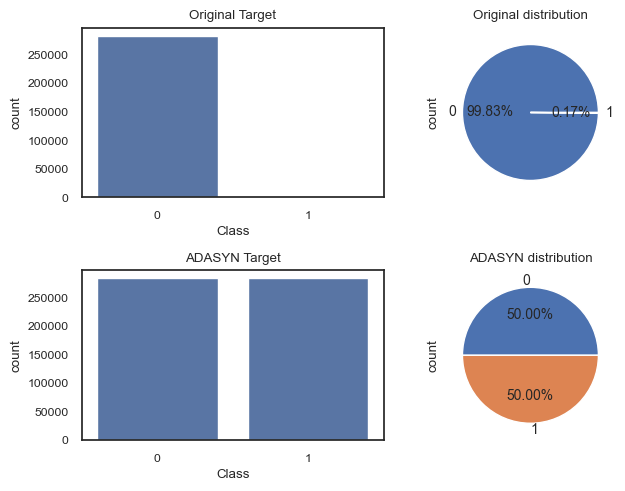

In [78]:
plot_target_balance(y_resampled, "ADASYN")

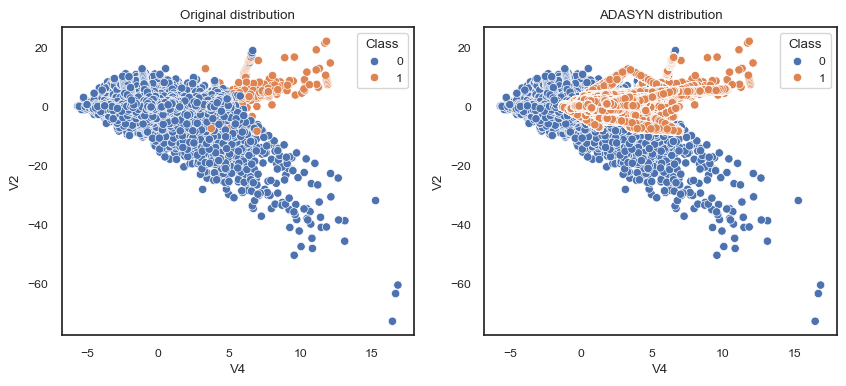

In [79]:
plot_scatter(X_resampled, y_resampled, "ADASYN")

Scaling and splitting...
Training...
Metrics...
Complete!
Duration: 498.3730719089508


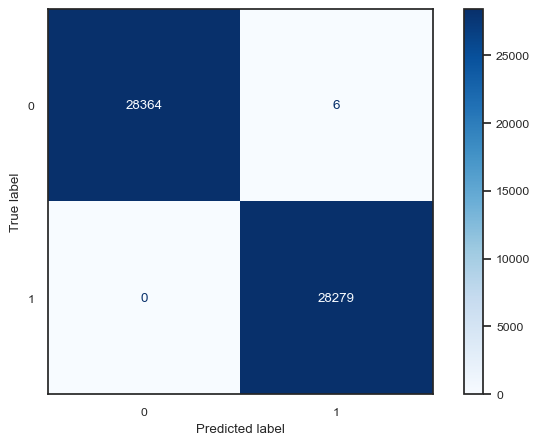

In [80]:
get_results(X_resampled, y_resampled, TECHNIQUE_NAME = "ADASYN",
            TECHNIQUE_TYPE = "Oversampling")

### Undersampling vs. Oversampling

In [81]:
SUMMARY = create_summary()

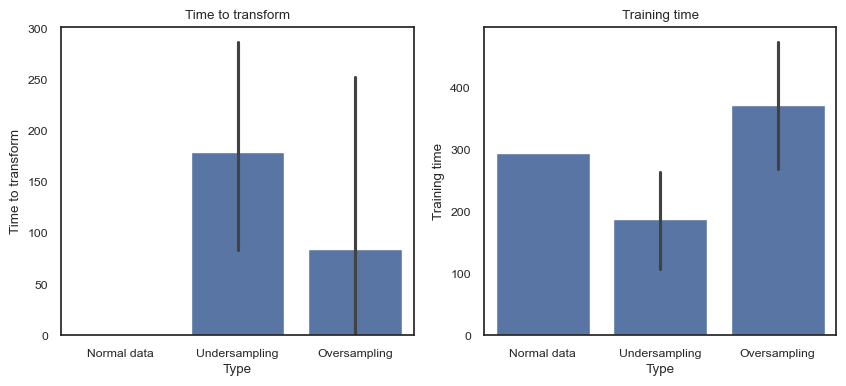

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 4), sharey = False)

sns.barplot(data = SUMMARY, x = "Type", y = "Time to transform", estimator = "mean", ax = ax1)
ax1.set_title("Time to transform")
sns.barplot(data = SUMMARY, x = "Type", y = "Training time", estimator = "mean", ax = ax2)
ax2.set_title("Training time");

Izbor između tehnika undersamplinga i oversamplinga podrazumeva kompromis između vremena potrebnog za transformaciju podataka i efikasnosti obuke modela. Smanjenje broja instanci putem undersampling-a može značajno ubrzati proces treninga modela. Nasuprot tome, oversampling dodaje više instanci, što može povećati vreme potrebno za trening model. Undersampling na ovom primeru je zahtevao manje vremena za pripremu podataka, on na kraju ubrzava fazu obuke modela zahvaljujući manjoj veličini skupa podataka. Ova ravnoteža naglašava potrebu da se uzmu u obzir i vremenski i performansni faktori pri odabiru najprikladnije tehnike za rešavanje problema neuravnoteženosti klasa u određenom zadatku mašinskog učenja.

### Poređenje tehnika

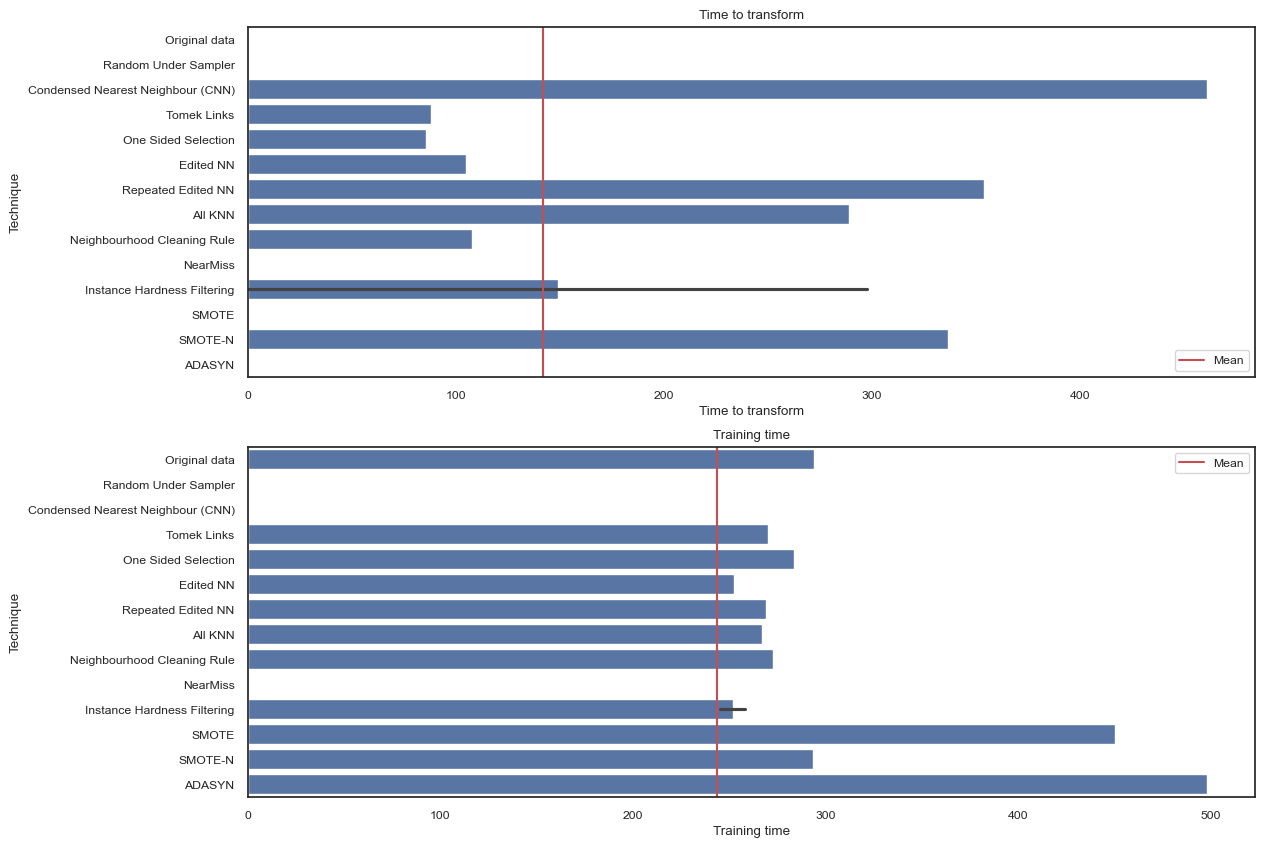

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (13, 10), sharex = False)

sns.barplot(data = SUMMARY, y = "Technique", x = "Time to transform", ax = ax1)
ax1.axvline(SUMMARY['Time to transform'].mean(), color = 'r', label = "Mean")
ax1.set_title("Time to transform")
ax1.legend(loc = "lower right")
sns.barplot(data = SUMMARY, y = "Technique", x = "Training time", ax = ax2)
ax2.axvline(SUMMARY['Training time'].mean(), color = 'r', label = "Mean")
ax2.set_title("Training time")
ax2.legend(loc = "upper right");

### Computational Trade-off

In [84]:
temp = SUMMARY[['Technique', 'Type', 'Time to transform', 'Training time']]

scaler = StandardScaler()
temp[['Time to transform', 'Training time']] = scaler.fit_transform(temp[['Time to transform', 'Training time']])

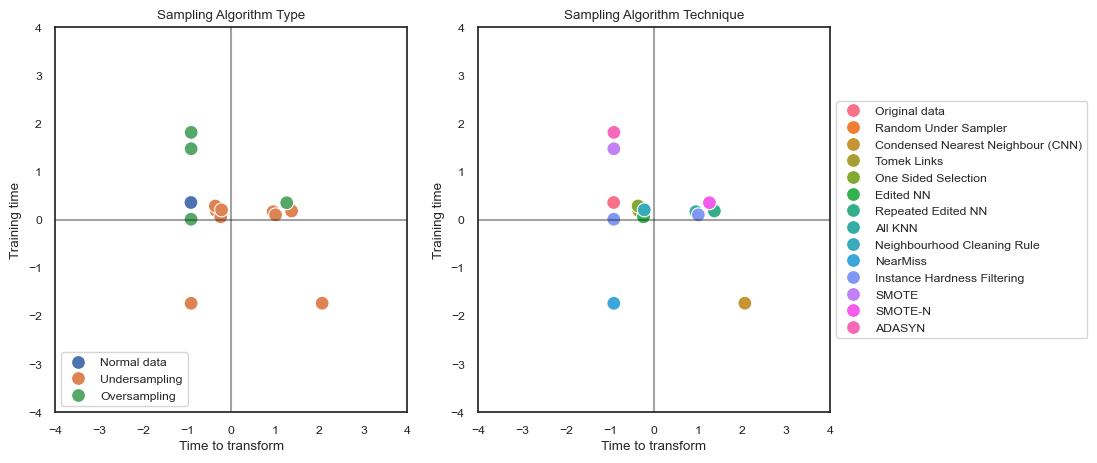

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 5))

sns.scatterplot(data = temp, x = "Time to transform",
                y = "Training time", hue = "Type", s = 100, ax = ax1)
ax1.grid(False)
ax1.set_ylim(-4, 4)
ax1.set_xlim(-4, 4)
ax1.legend(loc = "lower left")
ax1.axhline(0, color = 'k', alpha = 0.4)
ax1.axvline(0, color = 'k', alpha = 0.4)
ax1.set_title("Sampling Algorithm Type")

sns.scatterplot(data = temp, x = "Time to transform",
                y = "Training time", hue = "Technique", s = 100, ax = ax2)
ax2.grid(False)
ax2.set_ylim(-4, 4)
ax2.set_xlim(-4, 4)
ax2.legend(loc = 'center left',  bbox_to_anchor = (1, 0.5))
ax2.axhline(0, color = "k", alpha = 0.4)
ax2.axvline(0, color = "k", alpha = 0.4)
ax2.set_title("Sampling Algorithm Technique");


### Poređenje statistike

In [86]:
SUMMARY.groupby("Type")[["Time to transform", "Training time"]].mean().style.highlight_max(axis=0, color = "red")

In [87]:
SUMMARY.groupby(["Type", "Technique"])[["Time to transform", "Training time"]].mean().style.highlight_max(axis=0, color = "red")

### Tehnika i performanse modela

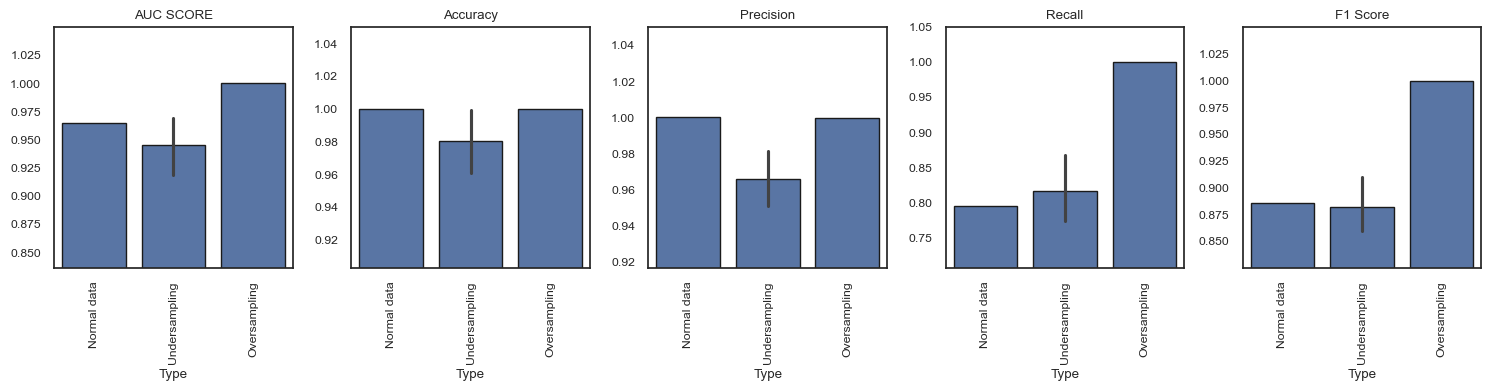

In [88]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5, nrows = 1, figsize = (15, 4), sharey = False)

axes = [ax1, ax2, ax3, ax4, ax5]

for ax, feature in enumerate(SUMMARY.drop(["Technique", "Time to transform", "Training time", "Type"], axis = 1).columns):
    
    sns.barplot(data = SUMMARY, x = "Type", y = feature, ax = axes[ax], edgecolor = "k")
    axes[ax].set_xticklabels(SUMMARY["Type"].unique(), rotation = 90)
    axes[ax].set_ylim(bottom = SUMMARY[feature].min() - 0.01)
    axes[ax].set_title(f"{feature}")
    axes[ax].set_ylabel("")
plt.tight_layout()

### Poređenje metrika tipova

In [89]:
from sklearn.preprocessing import MinMaxScaler 

temp = SUMMARY[['Technique', 'Type', 'AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score"]]

scaler = MinMaxScaler()
temp[['AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score"]] = scaler.fit_transform(temp[['AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score"]])

In [90]:
temp["Overall score"] = temp[['AUC SCORE', 'Accuracy', 'Precision', 'Recall', "F1 Score"]].sum(axis = 1)

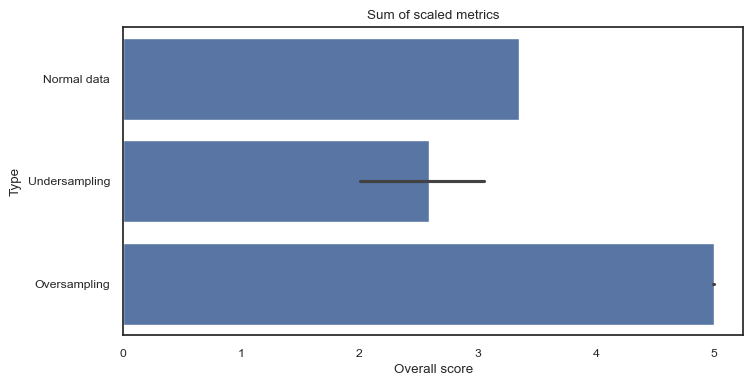

In [91]:
plt.figure(figsize = (8, 4))
sns.barplot(data = temp, y = "Type", x = "Overall score")
plt.title("Sum of scaled metrics");

In [92]:
temp.groupby("Type").mean(numeric_only=True).sort_values(by="Overall score", ascending=False).style.highlight_max(axis=0, color="lightgreen")

### Poređenje metrika tehnika

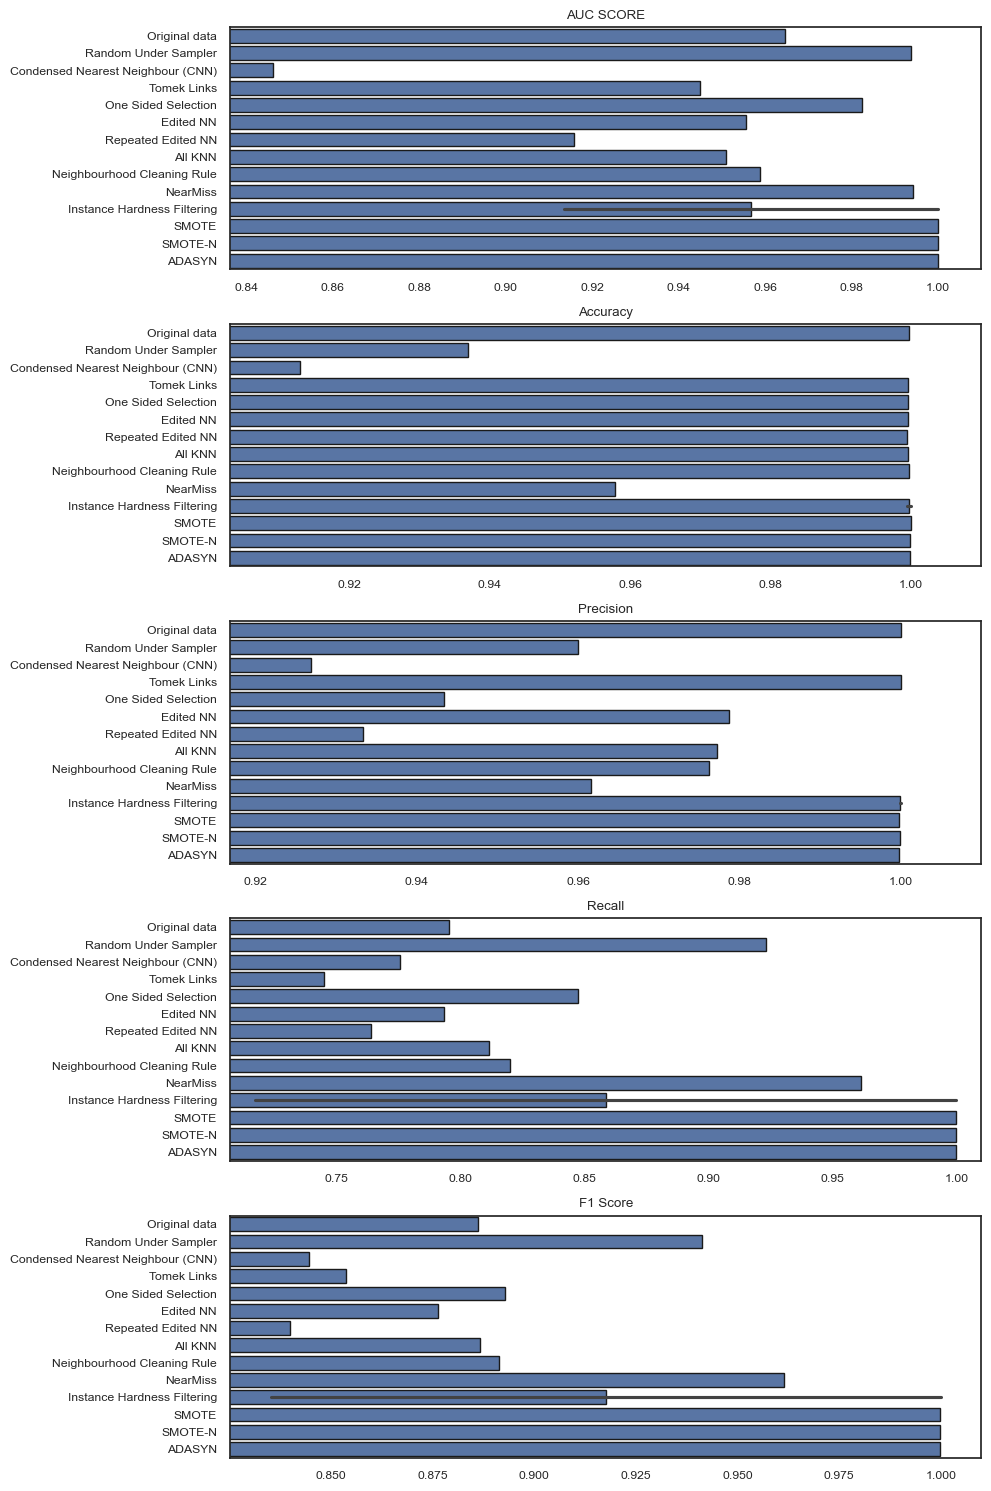

In [93]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 1, nrows = 5, figsize = (10, 15), sharey = False)

axes = [ax1, ax2, ax3, ax4, ax5]

for ax, feature in enumerate(SUMMARY.drop(["Technique", "Time to transform", "Training time", "Type"], axis = 1).columns):
    
    sns.barplot(data = SUMMARY, y = "Technique", x = feature, ax = axes[ax], edgecolor = "k")
    axes[ax].set_xlim(left = SUMMARY[feature].min() - 0.01, right = SUMMARY[feature].max() + 0.01)
    axes[ax].set_title(f"{feature}")
    axes[ax].set_xlabel("")
    axes[ax].set_ylabel("")
    
plt.tight_layout()

### Opšte poređenje tehnika

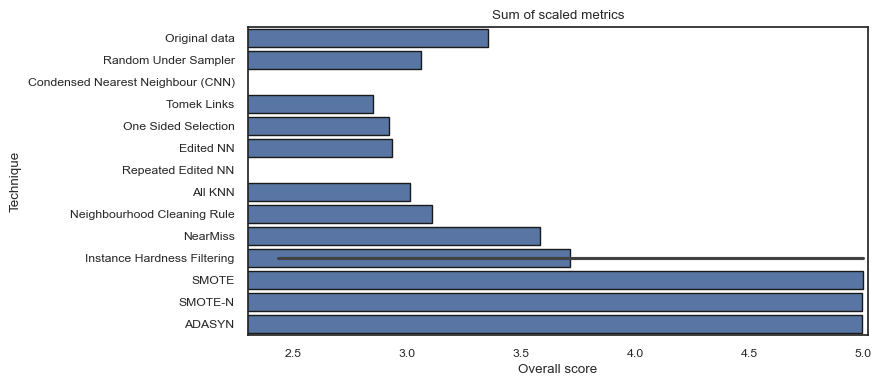

In [94]:
plt.figure(figsize = (8, 4))
sns.barplot(data = temp, y = "Technique", x = "Overall score", edgecolor = 'k')
plt.xlim(left = 2.3, right = 5.02)
plt.title("Sum of scaled metrics");

In [95]:
temp.groupby("Technique").mean(numeric_only=True).sort_values(by="Overall score", ascending=False).style.highlight_max(axis=0, color="lightgreen")

### Poređenje metrika između Tehnike i Tipa

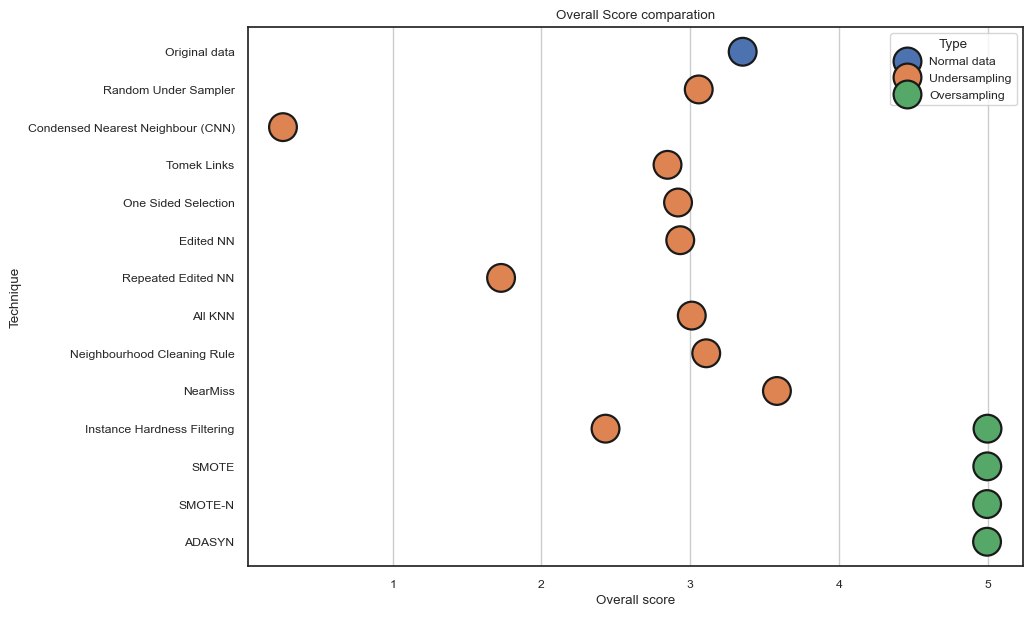

In [96]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = temp, x = "Overall score"
                , y = "Technique", hue = "Type", s = 400, edgecolor = 'k')
plt.title("Overall Score comparation")
plt.grid(axis = 'x');

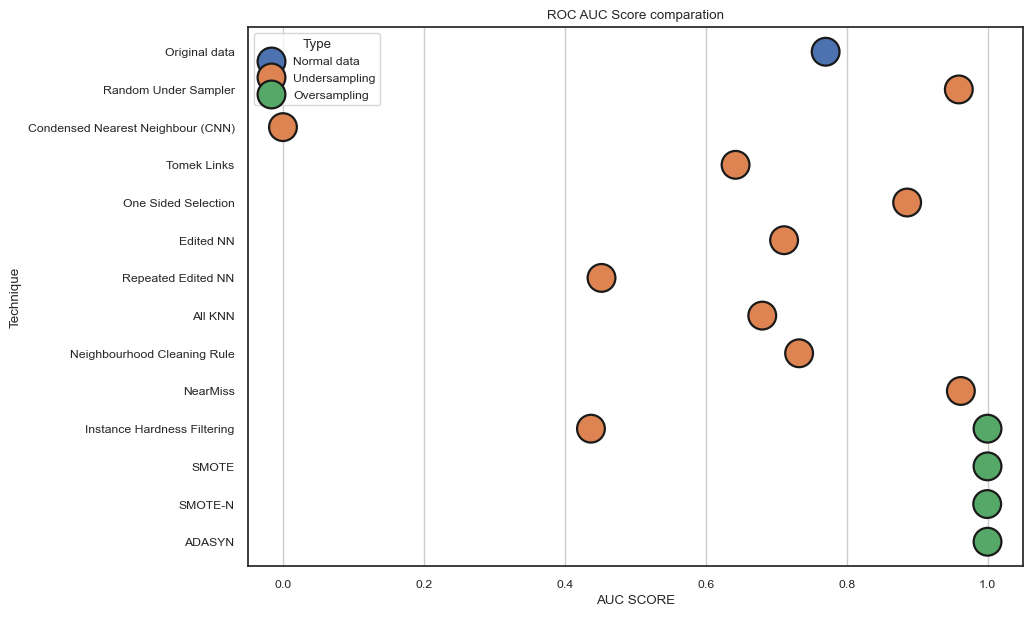

In [97]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = temp, x = "AUC SCORE"
                , y = "Technique", hue = "Type", s = 400, edgecolor = 'k')
plt.title("ROC AUC Score comparation")
plt.grid(axis = 'x');

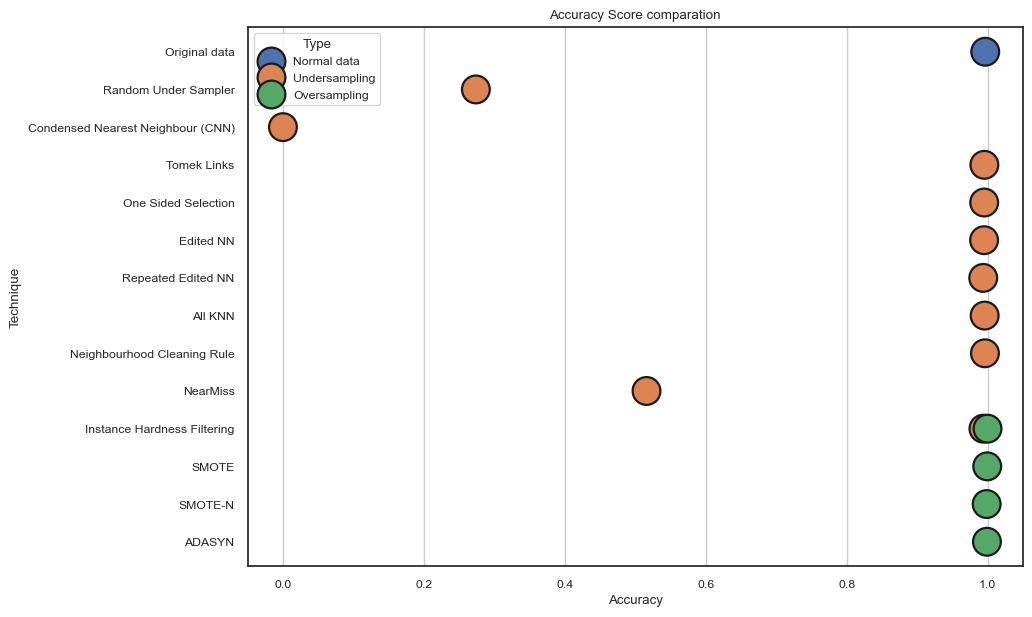

In [98]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = temp, x = "Accuracy"
                , y = "Technique", hue = "Type", s = 400, edgecolor = 'k')
plt.title("Accuracy Score comparation")
plt.grid(axis = 'x');

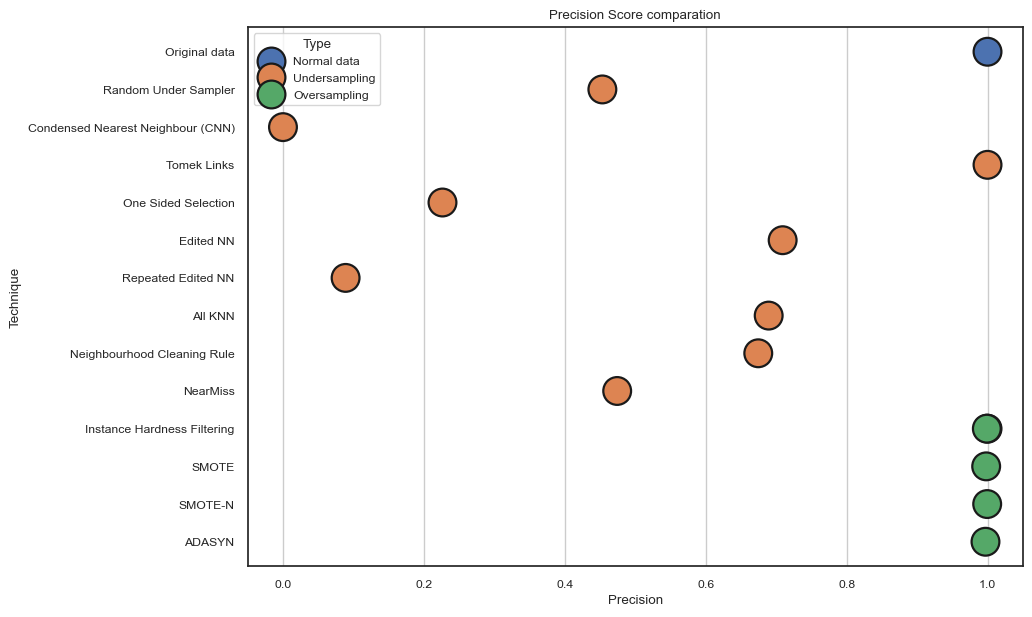

In [99]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = temp, x = "Precision"
                , y = "Technique", hue = "Type", s = 400, edgecolor = 'k')
plt.title("Precision Score comparation")
plt.grid(axis = 'x');

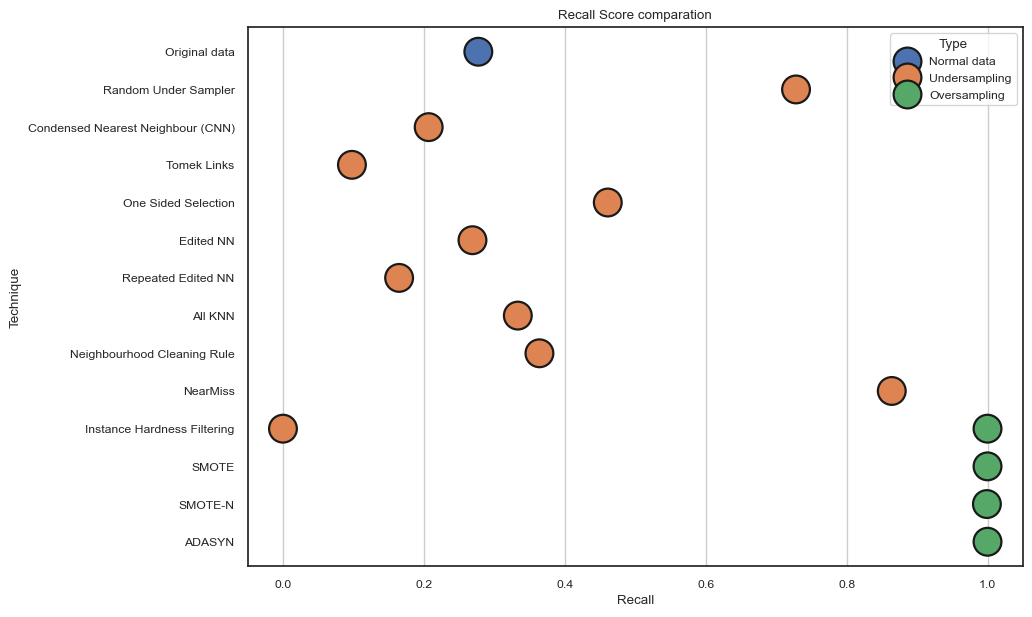

In [100]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = temp, x = "Recall"
                , y = "Technique", hue = "Type", s = 400, edgecolor = 'k')
plt.title("Recall Score comparation")
plt.grid(axis = 'x');

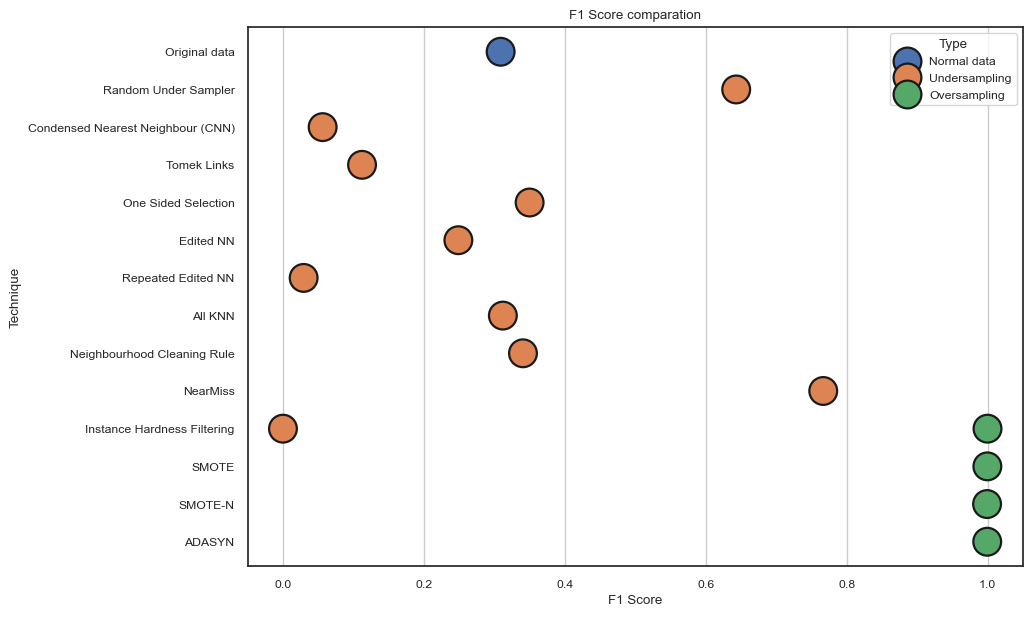

In [101]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = temp, x = "F1 Score"
                , y = "Technique", hue = "Type", s = 400, edgecolor = 'k')
plt.title("F1 Score comparation")
plt.grid(axis = 'x');

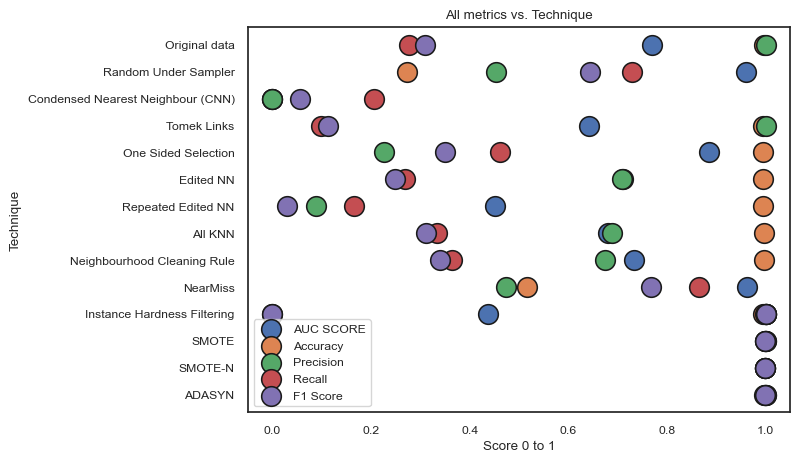

In [102]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = temp, x = "AUC SCORE"
                , y = "Technique", s = 200, edgecolor = 'k', label = "AUC SCORE")

sns.scatterplot(data = temp, x = "Accuracy"
                , y = "Technique", s = 200, edgecolor = 'k', label = "Accuracy")

sns.scatterplot(data = temp, x = "Precision"
                , y = "Technique", s = 200, edgecolor = 'k', label = "Precision")

sns.scatterplot(data = temp, x = "Recall"
                , y = "Technique", s = 200, edgecolor = 'k', label = "Recall")

sns.scatterplot(data = temp, x = "F1 Score"
                , y = "Technique", s = 200, edgecolor = 'k', label = "F1 Score")

plt.legend(loc = "lower left")
plt.xlabel("Score 0 to 1")
plt.title("All metrics vs. Technique");

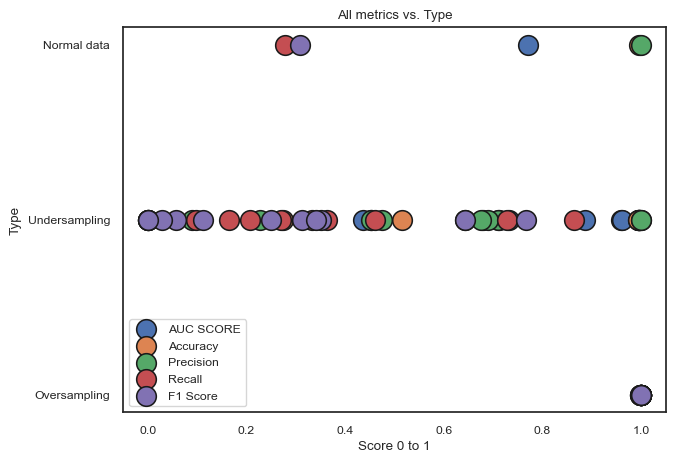

In [103]:
plt.figure(figsize = (7, 5))

sns.scatterplot(data = temp, x = "AUC SCORE"
                , y = "Type", s = 200, edgecolor = 'k', label = "AUC SCORE")

sns.scatterplot(data = temp, x = "Accuracy"
                , y = "Type", s = 200, edgecolor = 'k', label = "Accuracy")

sns.scatterplot(data = temp, x = "Precision"
                , y = "Type", s = 200, edgecolor = 'k', label = "Precision")

sns.scatterplot(data = temp, x = "Recall"
                , y = "Type", s = 200, edgecolor = 'k', label = "Recall")

sns.scatterplot(data = temp, x = "F1 Score"
                , y = "Type", s = 200, edgecolor = 'k', label = "F1 Score")

plt.xlabel("Score 0 to 1")
plt.legend(loc = "lower left")
plt.title("All metrics vs. Type");